<h1>
–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∞—è —Ä–∞–±–æ—Ç–∞ - –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–≥–æ –ø–æ–≤–µ–¥–µ–Ω–∏—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –º–∞–≥–∞–∑–∏–Ω–∞ "–í –æ–¥–∏–Ω –∫–ª–∏–∫"
</h1>

<h2>–¶–µ–ª–∏ —Ä–∞–±–æ—Ç—ã</h2>
<ul>
    <li>
        –ê–Ω–∞–ª–∏–∑ –æ—Å–Ω–æ–≤–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –¥–∞–Ω–Ω—ã—Ö
    </li>
    <li>
        –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –ø–∞–π–ø–ª–∞–π–Ω–∞ –º–æ–¥–µ–ª–∏ –∏ –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ –∏ –µ—ë –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ 
    </li>
    <li>
        –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–æ–¥–µ–ª–∏
    </li>
    <li>
        –°–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π
    </li>
</ul>

In [1]:
pip install numpy==1.23 numba==0.60 shap matplotlib==3.7.0 phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install scikit-learn -U

In [3]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import shap
import os

import seaborn as sns

## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
market_file_path_local = './data/market_file.csv'
market_file_path_yandex = '/datasets/market_file.csv'

market_money_path_local = './data/market_money.csv'
market_money_path_yandex = '/datasets/market_money.csv'

market_time_path_local = './data/market_time.csv'
market_time_path_yandex = '/datasets/market_time.csv'

money_df_path_local = './data/money.csv'
money_df_path_yandex = '/datasets/money.csv'

In [5]:
if os.path.exists(market_file_path_local):
	market_file = pd.read_csv(market_file_path_local)
else:
	market_file = pd.read_csv(market_file_path_yandex)
display(market_file.head(10))

if os.path.exists(market_money_path_local):
	market_money = pd.read_csv(market_money_path_local)
else:
	market_money = pd.read_csv(market_money_path_yandex)
display(market_money.head(10))

if os.path.exists(market_time_path_local):
	market_time = pd.read_csv(market_time_path_local)
else:
	market_time = pd.read_csv(market_time_path_yandex)
display(market_time.head(10))

if os.path.exists(money_df_path_local):
	money_df = pd.read_csv(money_df_path_local, sep = ';', decimal=',')
else:
	money_df = pd.read_csv(money_df_path_yandex, sep = ';', decimal=',')
display(money_df.head(10))

id –ü–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –¢–∏–ø —Å–µ—Ä–≤–∏—Å–∞ –†–∞–∑—Ä–µ—à–∏—Ç—å —Å–æ–æ–±—â–∞—Ç—å  \
0  215348                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
1  215349                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
2  215350                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                –Ω–µ—Ç   
3  215351                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   
4  215352                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                –Ω–µ—Ç   
5  215353                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   
6  215354                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   
7  215355                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                –Ω–µ—Ç   
8  215356                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   
9  215357                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   

   –ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  –ê–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   
6                 5.1                     3           431               0.23   
7                 4.7                     4           284               0.17   
8                 4.2                     4           192               0.14   
9                 3.9                     5           154               0.00   

             –ü–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è  –°—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  \
0                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    6   
1                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    4   
2               –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å                                    5   
3                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    5   
4                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    3   
5               –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å                                    4   
6           –ö–æ—Å–º–µ—Ç–∏–∫–∞ –∏ –∞–∫—Å–µ—Å—É–∞—Ä—ã                                    2   
7                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    5   
8           –ö–æ—Å–º–µ—Ç–∏–∫–∞ –∏ –∞–∫—Å–µ—Å—É–∞—Ä—ã                                    2   
9  –¢–µ—Ö–Ω–∏–∫–∞ –¥–ª—è –∫—Ä–∞—Å–æ—Ç—ã –∏ –∑–¥–æ—Ä–æ–≤—å—è                                    3   

   –ù–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  –û—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  –°—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2  
5                                   1               1                 4  
6                                   3               7                 2  
7                                   1               6                 4  
8                                   2               1                 3  
9                                   3               9                 5

id               –ü–µ—Ä–∏–æ–¥  –í—ã—Ä—É—á–∫–∞
0  215348  –ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü      0.0
1  215348        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü   3293.1
2  215348     –ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü      0.0
3  215349  –ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü   4472.0
4  215349        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü   4971.6
5  215349     –ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü   5216.0
6  215350  –ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü   4826.0
7  215350        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü   5058.4
8  215350     –ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü   5457.5
9  215351        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü   6610.4

id            –ü–µ—Ä–∏–æ–¥  –º–∏–Ω—É—Ç
0  215348     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     14
1  215348  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü     13
2  215349     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     10
3  215349  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü     12
4  215350     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     13
5  215350  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü      8
6  215351     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     13
7  215351  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü     11
8  215352     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     11
9  215352  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü      8

id  –ü—Ä–∏–±—ã–ª—å
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21
5  215353     3.95
6  215354     3.62
7  215355     5.26
8  215356     4.93
9  215357     4.66

##  –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [6]:
display(market_file.head(10))
print(market_file.columns)
print(market_file.info())
print(market_file.shape)
print(market_file[market_file.duplicated()]['id'].count())
market_file = market_file.rename(columns={
    '–ü–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å': '–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å',
    '–¢–∏–ø —Å–µ—Ä–≤–∏—Å–∞': '—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞',
    '–†–∞–∑—Ä–µ—à–∏—Ç—å —Å–æ–æ–±—â–∞—Ç—å': '—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å',
    '–ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å': '–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å',
    '–ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å': '–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å', 
    '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å': '–¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å',
    '–ê–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏': '–∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏',
    '–ü–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è': '–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è', 
    '–°—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç': '—Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç',
    '–ù–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª': '–Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª',
    '–û—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞': '–æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞', 
    '–°—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç': '—Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç',
})
market_file['—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞'] = market_file['—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞'].apply(lambda x: '—Å—Ç–∞–Ω–¥–∞—Ä—Ç' if x != '–ø—Ä–µ–º–∏—É–º' else x)

id –ü–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –¢–∏–ø —Å–µ—Ä–≤–∏—Å–∞ –†–∞–∑—Ä–µ—à–∏—Ç—å —Å–æ–æ–±—â–∞—Ç—å  \
0  215348                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
1  215349                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
2  215350                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                –Ω–µ—Ç   
3  215351                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   
4  215352                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                –Ω–µ—Ç   
5  215353                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   
6  215354                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   
7  215355                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                –Ω–µ—Ç   
8  215356                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   
9  215357                 –°–Ω–∏–∑–∏–ª–∞—Å—å   —Å—Ç–∞–Ω–¥–∞—Ä—Ç—Ç                 –¥–∞   

   –ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  –ê–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   
6                 5.1                     3           431               0.23   
7                 4.7                     4           284               0.17   
8                 4.2                     4           192               0.14   
9                 3.9                     5           154               0.00   

             –ü–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è  –°—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  \
0                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    6   
1                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    4   
2               –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å                                    5   
3                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    5   
4                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    3   
5               –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å                                    4   
6           –ö–æ—Å–º–µ—Ç–∏–∫–∞ –∏ –∞–∫—Å–µ—Å—É–∞—Ä—ã                                    2   
7                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π                                    5   
8           –ö–æ—Å–º–µ—Ç–∏–∫–∞ –∏ –∞–∫—Å–µ—Å—É–∞—Ä—ã                                    2   
9  –¢–µ—Ö–Ω–∏–∫–∞ –¥–ª—è –∫—Ä–∞—Å–æ—Ç—ã –∏ –∑–¥–æ—Ä–æ–≤—å—è                                    3   

   –ù–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  –û—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  –°—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2  
5                                   1               1                 4  
6                                   3               7                 2  
7                                   1               6                 4  
8                                   2               1                 3  
9                                   3               9                 5

Index(['id', '–ü–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å', '–¢–∏–ø —Å–µ—Ä–≤–∏—Å–∞', '–†–∞–∑—Ä–µ—à–∏—Ç—å —Å–æ–æ–±—â–∞—Ç—å',
       '–ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å', '–ú–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å', '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å',
       '–ê–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏', '–ü–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è',
       '–°—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç',
       '–ù–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª', '–û—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞',
       '–°—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   –ü–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å            1300 non-null   object 
 2   –¢–∏–ø —Å–µ—Ä–≤–∏—Å–∞  

In [7]:
display(market_money.head(10))
print(market_money.columns)
print(market_money.info())
print(market_money.shape)
market_money = market_money.rename(columns = {
	'–ü–µ—Ä–∏–æ–¥': '–ø–µ—Ä–∏–æ–¥',
	'–í—ã—Ä—É—á–∫–∞' : '–≤—ã—Ä—É—á–∫–∞'
})
print(market_money[market_money.duplicated()]['id'].count())

id               –ü–µ—Ä–∏–æ–¥  –í—ã—Ä—É—á–∫–∞
0  215348  –ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü      0.0
1  215348        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü   3293.1
2  215348     –ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü      0.0
3  215349  –ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü   4472.0
4  215349        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü   4971.6
5  215349     –ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü   5216.0
6  215350  –ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü   4826.0
7  215350        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü   5058.4
8  215350     –ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü   5457.5
9  215351        —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü   6610.4

Index(['id', '–ü–µ—Ä–∏–æ–¥', '–í—ã—Ä—É—á–∫–∞'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   –ü–µ—Ä–∏–æ–¥   3900 non-null   object 
 2   –í—ã—Ä—É—á–∫–∞  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None
(3900, 3)
0


<p>
    –°–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞–Ω–Ω—ã–µ –∏–∑ —Ç–∞–±–ª–∏—Ü—ã —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ –≤—ã—Ä—É—á–∫–µ, –ø—Ä–∏–≤–æ–¥–∏–º –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤ –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É, –ø—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã –∏ –ø—Ä–æ–≤–µ—Ä—è–µ–º —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö. 
</p>

In [8]:
display(market_time.head(10))
print(market_time.columns)
print(market_time.info())
print(market_time.shape)
market_time = market_time.rename(columns = {
	'–ü–µ—Ä–∏–æ–¥': '–ø–µ—Ä–∏–æ–¥'
})
print(market_time['–ø–µ—Ä–∏–æ–¥'].unique())
market_time['–ø–µ—Ä–∏–æ–¥'] = market_time['–ø–µ—Ä–∏–æ–¥'].apply(lambda x: x if x == '—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü' else '–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü')
print(market_time[market_time.duplicated()]['id'].count())

id            –ü–µ—Ä–∏–æ–¥  –º–∏–Ω—É—Ç
0  215348     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     14
1  215348  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü     13
2  215349     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     10
3  215349  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü     12
4  215350     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     13
5  215350  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü      8
6  215351     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     13
7  215351  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü     11
8  215352     —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü     11
9  215352  –ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü      8

Index(['id', '–ü–µ—Ä–∏–æ–¥', '–º–∏–Ω—É—Ç'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   –ü–µ—Ä–∏–æ–¥  2600 non-null   object
 2   –º–∏–Ω—É—Ç   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None
(2600, 3)
['—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü' '–ø—Ä–µ–¥—ã–¥—Ü—â–∏–π_–º–µ—Å—è—Ü']
0


<p>
    –°–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞–Ω–Ω—ã–µ –∏–∑ —Ç–∞–±–ª–∏—Ü—ã —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ–± –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ —Å–∞–π—Ç–µ, –ø—Ä–∏–≤–æ–¥–∏–º –Ω–∞–∑–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É, –ø—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã –∏ –ø—Ä–æ–≤–µ—Ä—è–µ–º —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö, —É–¥–∞–ª—è–µ–º –æ–ø–µ—á–∞—Ç–∫—É –≤ –Ω–∞–∑–≤–∞–Ω–∏–∏ –ø–µ—Ä–∏–æ–¥–∞ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞. 
</p>

In [9]:
display(money_df.head(10))
print(money_df.columns)
print(money_df.info())
print(money_df.shape)
money_df = money_df.rename(columns = {
	'–ü—Ä–∏–±—ã–ª—å': '–ø—Ä–∏–±—ã–ª—å'
})
print(money_df[money_df.duplicated()]['id'].count())

id  –ü—Ä–∏–±—ã–ª—å
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21
5  215353     3.95
6  215354     3.62
7  215355     5.26
8  215356     4.93
9  215357     4.66

Index(['id', '–ü—Ä–∏–±—ã–ª—å'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   –ü—Ä–∏–±—ã–ª—å  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None
(1300, 2)
0


<p>
    –°–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞–Ω–Ω—ã–µ –∏–∑ —Ç–∞–±–ª–∏—Ü—ã —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ –ø—Ä–∏–±—ã–ª–∏ –∫–∞–∂–¥–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è, –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–µ–º —Å—Ç–æ–ª–±–µ—Ü, –ø—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã.
</p>

### –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑

In [10]:
def plotHistForCategorialColumn(columnName, dataFrame = market_file):
    ax = sns.countplot(y = columnName, data = dataFrame, label = columnName)
    ax.set_xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–∫–∑–µ–º–ø–ª—è—Ä–æ–≤')
    ax.set_title('–ì—Ä–∞—Ñ–∏–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è ' + columnName + ' –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º')

In [11]:
def plotGraphsForContiniousColumn(columnName, bins = 30, dataFrame = market_file):
	fig, axes = plt.subplots(1, 2, figsize=(15, 10))

	sns.histplot(ax=axes[0], x=dataFrame[columnName], bins = bins)
	axes[0].set_title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –¥–ª—è ' + columnName)
	axes[0].set(ylabel = '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–∫–∑–µ–º–ø–ª—è—Ä–æ–≤')

	sns.boxplot(ax=axes[1], x=dataFrame[columnName])
	axes[1].set_title('–ë–æ–∫—Å–ø–ª–æ—Ç –¥–ª—è ' + columnName)

In [12]:
market_file_continious_columns = [
    '–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å',
    '–¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å',
    '–∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏',
    '—Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç'   
]

market_file_discrete_columns = [
    '–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å',
    '—Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç',
    '–Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª',
    '–æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞'
]

market_file_amount_columns = market_file_continious_columns + market_file_discrete_columns

market_file_categor_columns = [
    '–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è',
    '—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞',
    '–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å',
	'—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å'
]

In [13]:
for columnName in market_file_amount_columns:
	print(columnName, '\n')
	print(market_file[columnName].describe(), '\n')

–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å 

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å, dtype: float64 

–¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å 

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å, dtype: float64 

–∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏ 

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏, dtype: float64 

—Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç 

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: —Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–

<p>
	–°–º–æ—Ç—Ä–∏–º –Ω–∞ –æ–ø–∏—Å–∞–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –Ω–∞ –ø–µ—Ä–≤—ã–π –≤–∑–≥–ª—è–¥ –∞–Ω–æ–º–∞–ª–∏–∏ –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å —Ç–æ–ª—å–∫–æ –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–∞ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, –Ω–æ —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —ç—Ç–æ –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è –ø—Ä–æ—Å—Ç–æ —Ç–µ–º, —á—Ç–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å –æ—Ç–∫—Ä—ã–ª —Å–∞–π—Ç, –∞ –∑–∞—Ç–µ–º –µ–≥–æ –æ—Ç–≤–ª–µ–∫–ª–∏ –±–æ–ª–µ–µ –≤–∞–∂–Ω—ã –¥–µ–ª–∞ –∏ –æ–Ω –ø—Ä–æ—Å—Ç–æ –∑–∞–±—ã–ª –ø—Ä–æ –≤–∫–ª–∞–¥–∫—É —Å –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –º–∞–≥–∞–∑–∏–Ω–æ–º. 
</p>

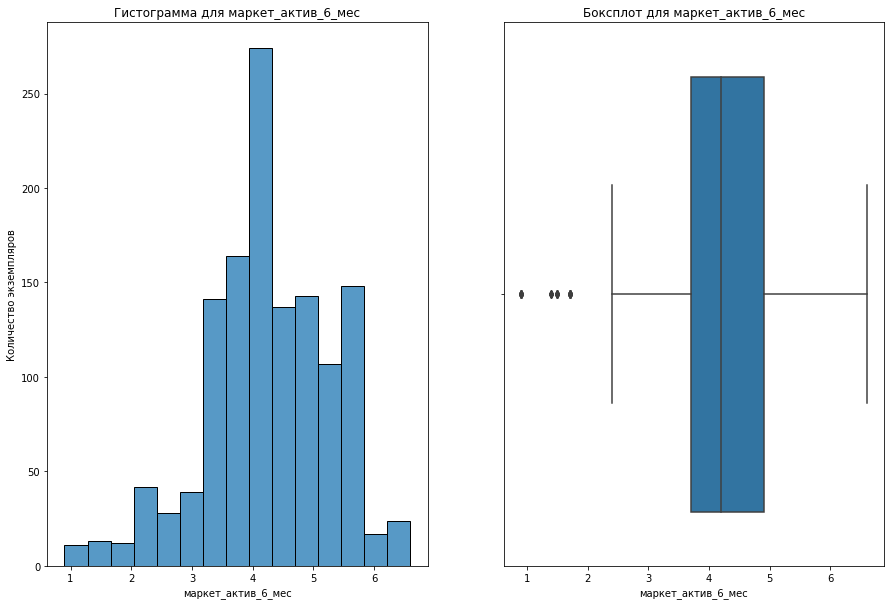

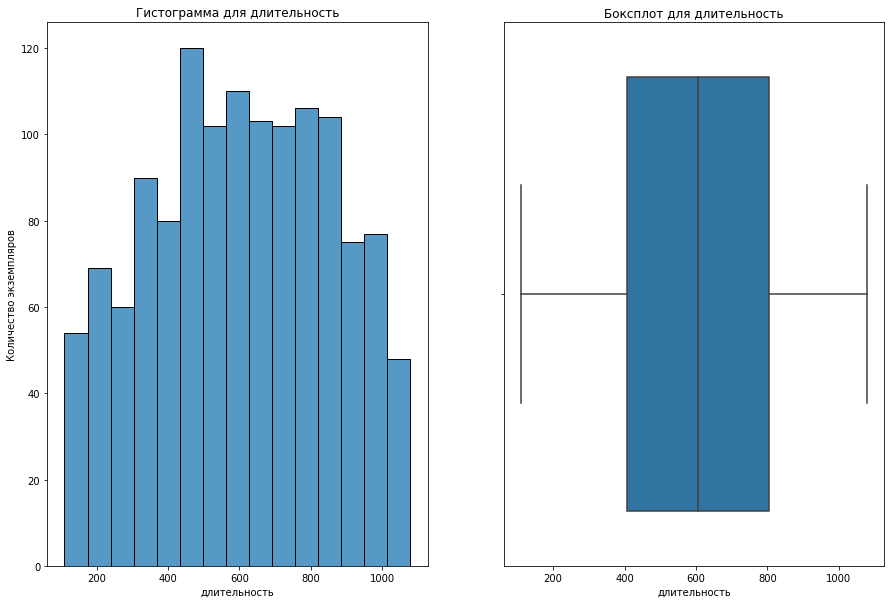

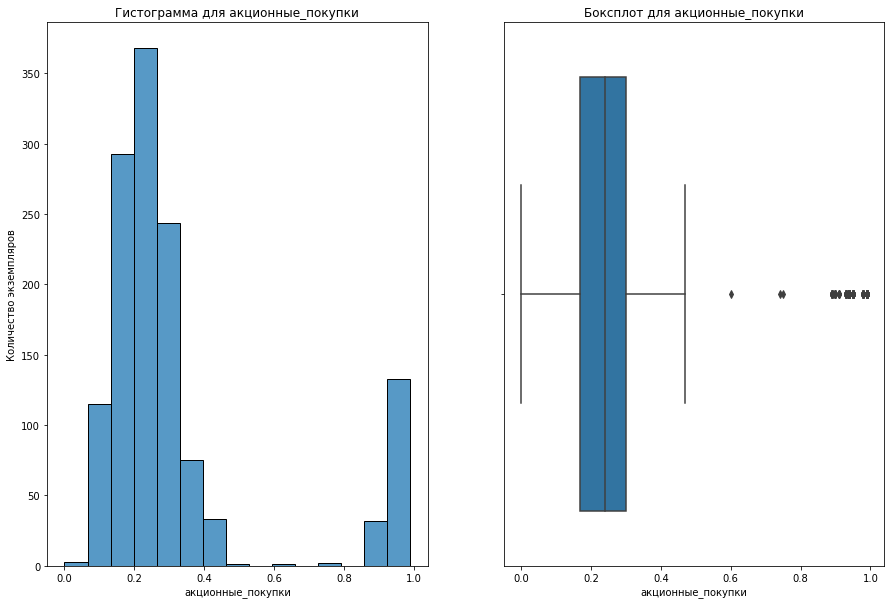

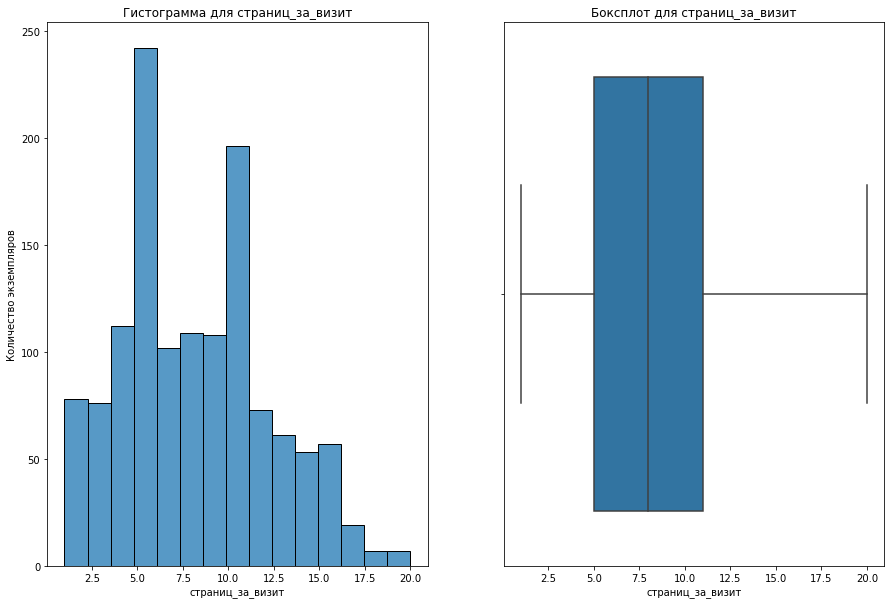

In [14]:
for column in market_file_continious_columns:
	plotGraphsForContiniousColumn(column, bins = 15)

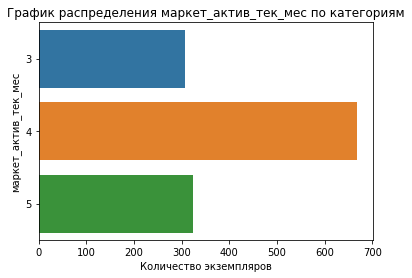

In [15]:
plotHistForCategorialColumn('–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å')

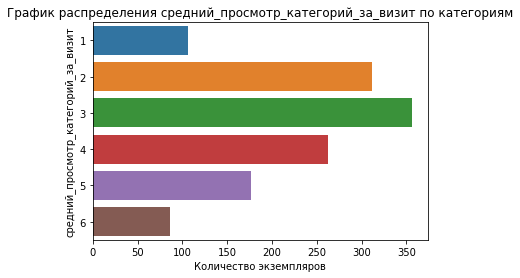

In [16]:
plotHistForCategorialColumn('—Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç')

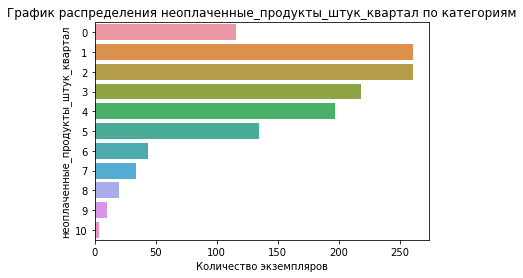

In [17]:
plotHistForCategorialColumn('–Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª')

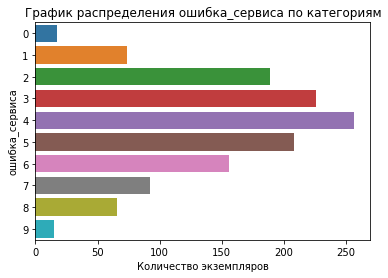

In [18]:
plotHistForCategorialColumn('–æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞')

In [19]:
print(market_file['–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å'].unique())

[5 4 3]


<p>
	–°—Ç—Ä–æ–∏–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –∏ —è—â–∏–∫ —Å —É—Å–∞–º–∏ —á—Ç–æ–±—ã –æ—Ü–µ–Ω–∏—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏ –≤–æ–∑–º–æ–∂–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã –¥–ª—è –Ω–∏—Ö. –ò–∑ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –≤–∏–¥–Ω–æ –≤–∏–∑—É–∞–ª—å–Ω–æ –æ—á–µ–Ω—å –Ω–µ–æ–±—ã—á–Ω–æ–µ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –≤ —Ç–µ–∫—É—â–µ–º –º–µ—Å—è—Ü–µ –∏ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤ –≤ –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö –ø–æ–∫—É–ø–∫–∞—Ö. 
</p>
<p>
	–ü–µ—Ä–≤–æ–µ –º–æ–∂–Ω–æ –æ–±—ä—è—Å–Ω–∏—Ç—å —Ç–µ–º, —á—Ç–æ –≤ –∫–æ–ª–æ–Ω–∫–µ "–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å" –≤—Å–µ–≥–æ 3 (—Ç—Ä–∏) —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è, —á—Ç–æ –∫–æ–Ω–µ—á–Ω–æ –¥–µ–ª–∞–µ—Ç –µ—ë —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏–µ –ø—Ä–∏ –ø–æ–º–æ—â–∏ boxplot –Ω–µ—Å–∫–æ–ª—å–∫–æ –±–µ—Å—Å–º—ã—Å–ª–µ–Ω–Ω—ã–º, –∞ –≤—Ç–æ—Ä–æ–π –º–æ–º–µ–Ω—Ç —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è —Ç–µ–º, —á—Ç–æ –µ—Å—Ç—å –∫—Ä—É–ø–Ω–∞—è –≥—Ä—É–ø–ø–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä–∞—è –≤—Å–µ–≥–¥–∞(–∏–ª–∏ –ø–æ—á—Ç–∏ –≤—Å–µ–≥–¥–∞)  –ø–æ–∫—É–ø–∞–µ—Ç —á—Ç–æ-—Ç–æ —Ç–æ–ª—å–∫–æ –ø–æ –∞–∫—Ü–∏–∏. 
</p>

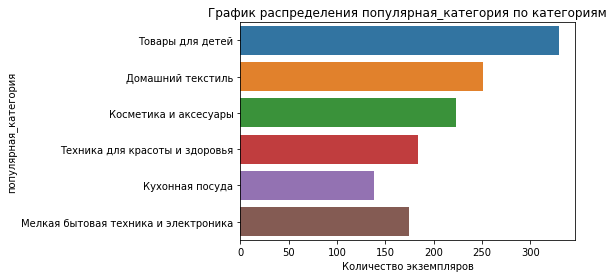

In [20]:
plotHistForCategorialColumn('–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è')

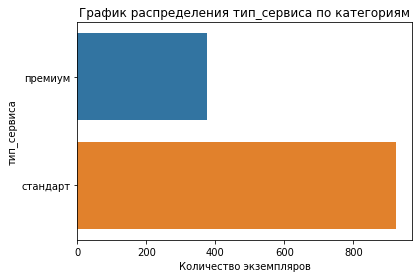

In [21]:
plotHistForCategorialColumn('—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞')

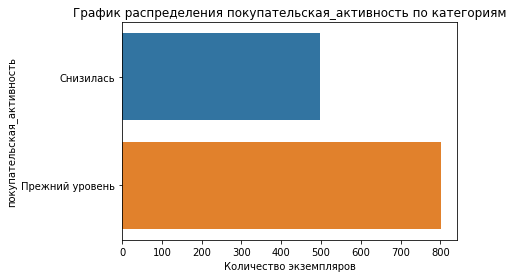

In [22]:
plotHistForCategorialColumn('–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å')

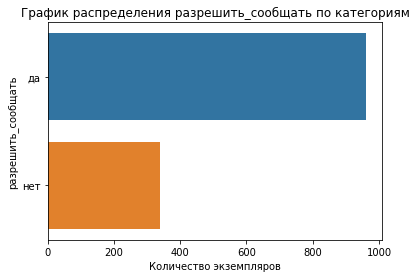

In [23]:
plotHistForCategorialColumn('—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å')

<p>
	–°—Ç—Ä–æ–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ —Ç–æ–π –∂–µ —Ç–∞–±–ª–∏—Ü—ã, —Ç—É—Ç —Å–ª–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å —á—Ç–æ-—Ç–æ –ø—Ä–∏–º–µ—á–∞—Ç–µ–ª—å–Ω–æ–µ, –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–∏–ª–∏—Å—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–º –æ–±—Ä–∞–∑–æ–º, –∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–µ –≤–∏–¥–Ω–æ —è–≤–Ω—ã—Ö –∞–Ω–æ–º–∞–ª–∏–π. 
</p>

In [24]:
market_money_num_columns = ['–≤—ã—Ä—É—á–∫–∞']
market_money_cat_columns = ['–ø–µ—Ä–∏–æ–¥']

In [25]:
for columnName in market_money_num_columns:
	print(columnName, '\n')
	print(market_money[columnName].describe(), '\n')

–≤—ã—Ä—É—á–∫–∞ 

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: –≤—ã—Ä—É—á–∫–∞, dtype: float64 



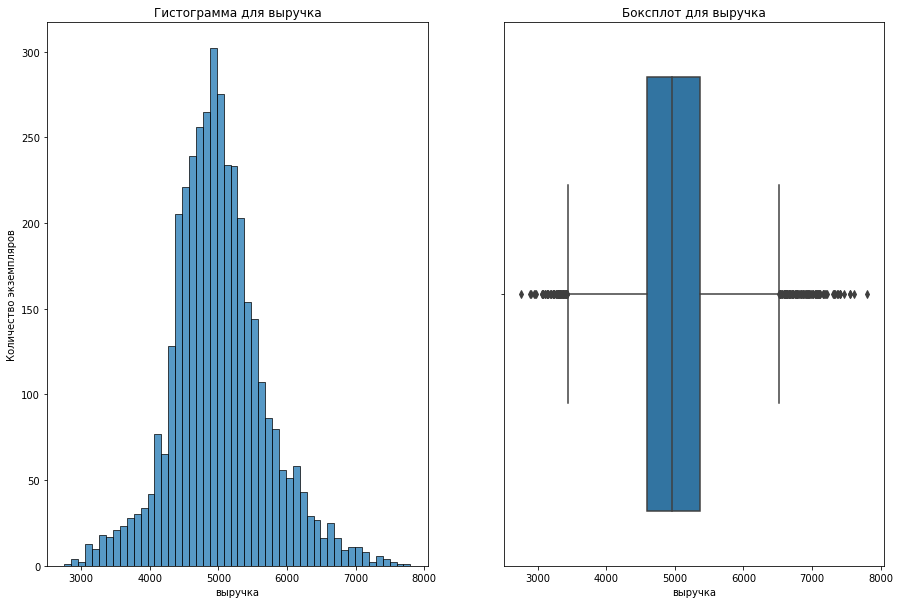

In [26]:
for column in market_money_num_columns:
	plotGraphsForContiniousColumn(column, bins = 50, dataFrame=market_money.query('–≤—ã—Ä—É—á–∫–∞ < 100000 and –≤—ã—Ä—É—á–∫–∞ > 0'))

In [27]:

ids_for_drop = market_money.query('–≤—ã—Ä—É—á–∫–∞ == 0')['id'].unique()
ids_for_drop = np.concatenate((ids_for_drop, market_money.query('–≤—ã—Ä—É—á–∫–∞ > 10000')['id'].unique()))
market_money = market_money.query('id not in @ids_for_drop')
market_file = market_file.query('id not in @ids_for_drop')
market_time = market_time.query('id not in @ids_for_drop')
money_df = money_df.query('id not in @ids_for_drop')

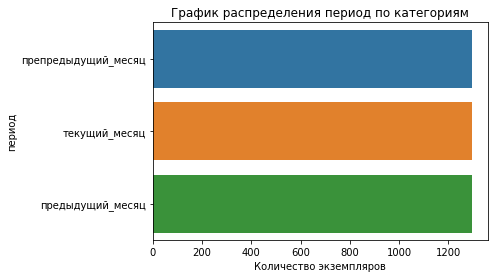

In [28]:
for column in market_money_cat_columns:
	plotHistForCategorialColumn(column, dataFrame=market_money)

<p>
	–ü—Ä–æ–≤–æ–¥–∏–º –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–π –Ω–∞–±–æ—Ä –æ–ø–µ—Ä–∞—Ü–∏–π –¥–ª—è —Ç–∞–±–ª–∏—Ü—ã —Å –≤—ã—Ä—É—á–∫–æ–π, —É–¥–∞–ª—è–µ–º —è–≤–Ω—ã–π –≤—ã–±—Ä–æ—Å —Å–æ –∑–Ω–∞—á–µ–Ω–∏–µ–º –±–æ–ª–µ–µ 10000 –∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å –Ω—É–ª–µ–≤–æ–π –≤—ã—Ä—É—á–∫–æ–π —Ö–æ—Ç—è –±—ã –≤ –æ–¥–Ω–æ–º –º–µ—Å—è—Ü–µ –∏–∑ –≤—Å–µ—Ö –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–≤. 
</p>

In [29]:
market_time_num_columns = ['–º–∏–Ω—É—Ç']
market_time_cat_columns = ['–ø–µ—Ä–∏–æ–¥']

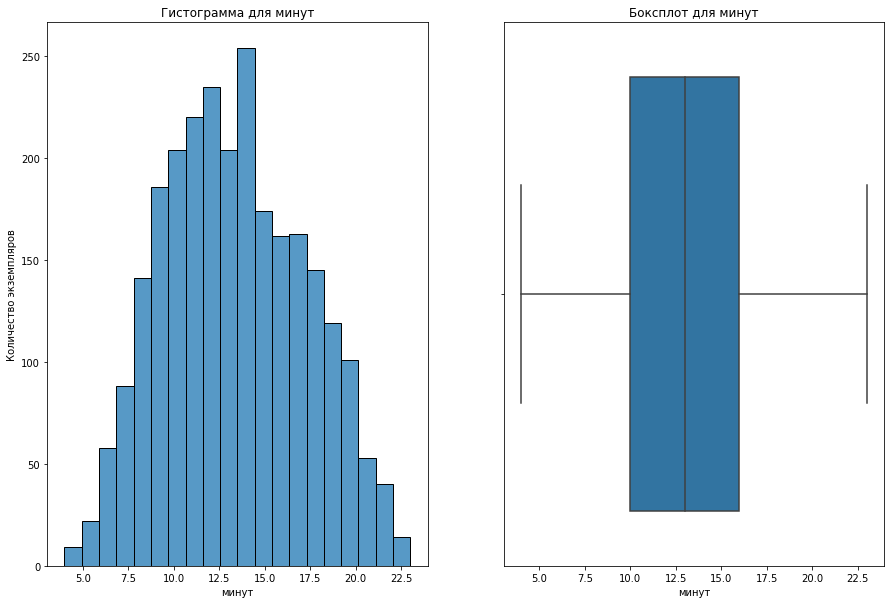

In [30]:
for column in market_time_num_columns:
	plotGraphsForContiniousColumn(column, bins = 20, dataFrame=market_time)

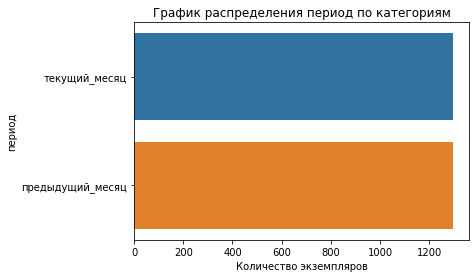

In [31]:
for column in market_time_cat_columns:
	plotHistForCategorialColumn(column, dataFrame=market_time)

<p>
	–ü—Ä–æ–≤–æ–¥–∏–º –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–π –Ω–∞–±–æ—Ä –æ–ø–µ—Ä–∞—Ü–∏–π –¥–ª—è —Ç–∞–±–ª–∏—Ü—ã —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–º –Ω–∞ —Å–∞–π—Ç–µ –≤—Ä–µ–º–µ–Ω–∏, –æ—Ç–º–µ—Ç–∏—Ç—å –∫–∞–∫–∏–µ-—Ç–æ –∞–Ω–æ–º–∞–ª–∏–∏ –Ω–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è –≤–æ–∑–º–æ–∂–Ω—ã–º. 
</p>

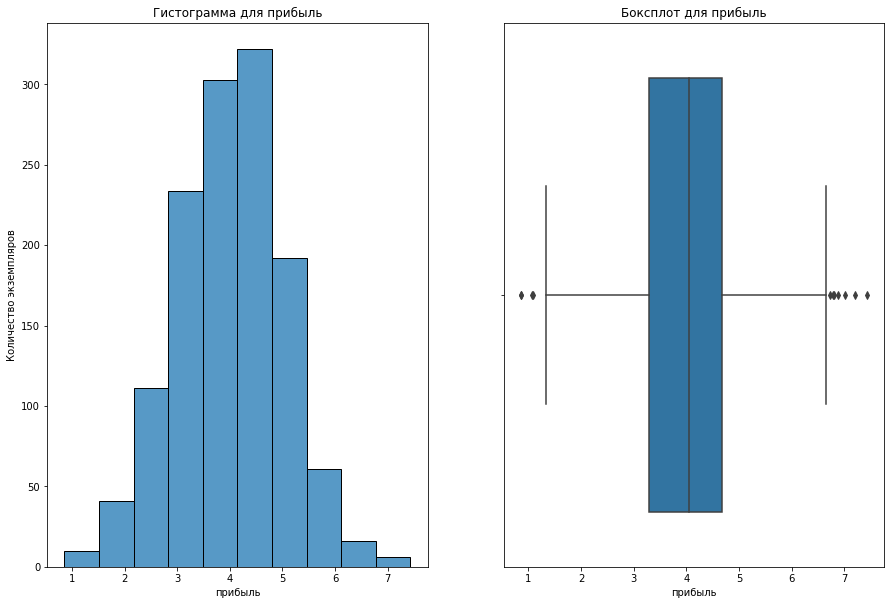

In [32]:
plotGraphsForContiniousColumn('–ø—Ä–∏–±—ã–ª—å', bins = 10, dataFrame=money_df)

<p>
	–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –¥–ª—è —Ç–∞–±–ª–∏—Ü—ã —Å –ø—Ä–∏–±—ã–ª—å—é. 
</p>

### –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –≤ –æ–¥–Ω—É —Ç–∞–±–ª–∏—Ü—É

In [33]:

pivot_money_table = market_money.pivot_table(index='id', columns=['–ø–µ—Ä–∏–æ–¥'])['–≤—ã—Ä—É—á–∫–∞']
market_table = market_file.merge(pivot_money_table, on='id')
market_table = market_table.rename(columns= {
    '–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü': '–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞',
    '–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü': '–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞',
    '—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü': '—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞'
})

pivot_time_table = market_time.pivot_table(index='id', columns=['–ø–µ—Ä–∏–æ–¥'])['–º–∏–Ω—É—Ç']
market_table = market_table.merge(pivot_time_table, on='id')
market_table = market_table.rename(columns= {
    '–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü': '–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–º–∏–Ω—É—Ç',
    '—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü': '—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü_–º–∏–Ω—É—Ç'
})

print(market_table.isna().sum())
market_table['–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞'] = market_table['–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞'].fillna(0)
market_table['–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞'] = market_table['–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞'].fillna(0)
market_table['—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞'] = market_table['—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞'].fillna(0)
print(market_table.isna().sum())


id                                     0
–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å              0
—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞                            0
—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å                     0
–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å                     0
–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å                   0
–¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å                           0
–∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏                      0
–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è                   0
—Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç    0
–Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª     0
–æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞                         0
—Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç                       0
–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞               0
–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞            0
—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞                  0
–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–º–∏–Ω—É—Ç                 0

In [34]:
market_table.shape

(1296, 18)

<p>
	–û–±—ä–µ–¥–∏–Ω—è–µ–º —Ç–∞–±–ª–∏—Ü—ã —Å –æ—Å–Ω–æ–≤–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–æ–º –ø–æ–≤–µ–¥–µ–Ω–∏–∏ —Å —Ç–∞–±–ª–∏—Ü–∞–º–∏ —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ –≤—Ä–µ–º–µ–Ω–∏ –Ω–∞ —Å–∞–π—Ç–µ –∏ —Ç–∞–±–ª–∏—Ü–µ–π —Å –≤—ã—Ä—É—á–∫–æ–π, –≤—ã–≤–æ–¥–∏–º –ø–æ–ª—É—á–∏–≤—à—É—é—Å—è —Ç–∞–±–ª–∏—Ü—É —Å –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏.  
</p>

In [35]:
market_table_continious_columns = [
    '–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å',
    '–¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å',
    '–∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏',
    '—Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç',
    '–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞', 
    '–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞', 
    '—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞',
    '–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–º–∏–Ω—É—Ç',
    '—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü_–º–∏–Ω—É—Ç'
]

market_table_discrete_columns = [
    '–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å',
    '—Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç',
    '–Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª',
    '–æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞'
]


market_table_num_cols = market_table_continious_columns + market_table_discrete_columns

market_table_cat_cols = [
    '–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è',
    '—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞',
    '—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å'
]

### –ê–Ω–∞–ª–∏–∑ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏

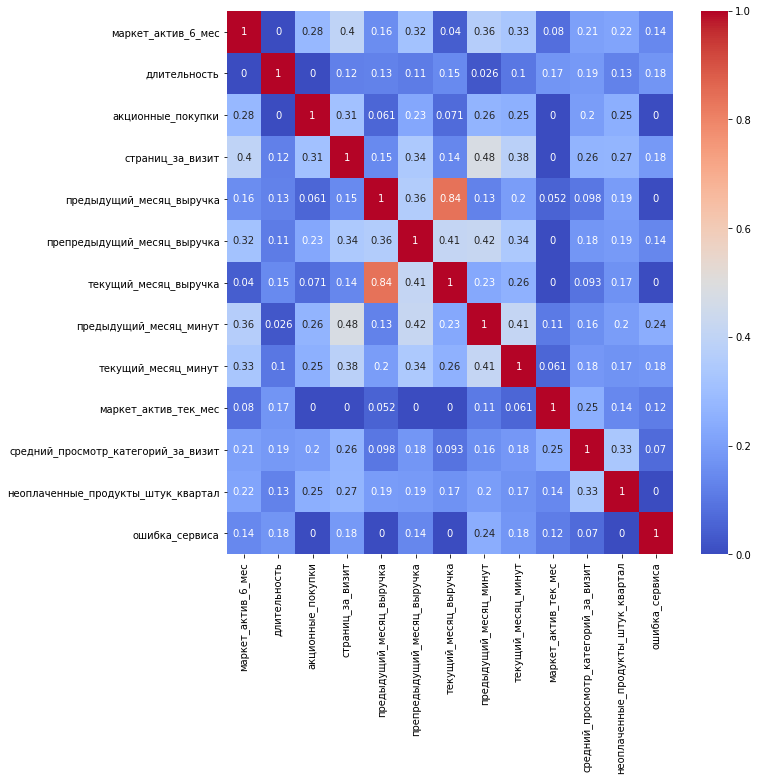

In [36]:
from phik import phik_matrix
correlation_matrix = phik_matrix(market_table[market_table_num_cols], interval_cols=market_table_continious_columns)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', ax = ax);

In [37]:

X_ = sm.add_constant(market_table[market_table_num_cols])
 
vif = pd.DataFrame()
vif["variables"] = X_.columns
vif["VIF"] = [variance_inflation_factor(X_.values, i).round(2) for i in range(X_.shape[1])]

display(vif)

variables     VIF
0                                 const  352.52
1                    –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å    1.22
2                          –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å    1.10
3                     –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏    1.19
4                      —Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç    1.42
5              –ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞    4.26
6           –ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞    1.61
7                 —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞    3.90
8                –ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–º–∏–Ω—É—Ç    1.53
9                   —Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü_–º–∏–Ω—É—Ç    1.32
10                 –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å    1.04
11  —Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç    1.18
12   –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª    1.20
13                       –æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞    1.08

<p>
	–î–ª—è –∞–Ω–∞–ª–∏–∑–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –∏ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã—Ö –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–µ–π –º—ã –Ω–∞—Ä–∏—Å—É–µ–º –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –∏ –ø–æ—Å—á–∏—Ç–∞–µ–º –≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω—ã–µ —Ñ–∞–∫—Ç–æ—Ä—ã.  –ò–∑ —Ç–∞–±–ª–∏—Ü—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–∞—è —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —ç—Ç–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –≤—ã—Ä—É—á–∫–æ–π –∑–∞ —Ç–µ–∫—É—â–∏–π –∏ –ø—Ä–µ–¥—ã–¥—É—â–∏–π –º–µ—Å—è—Ü—ã –Ω–∞ –æ–¥–Ω–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞. –í–æ–∑–º–æ–∂–Ω–æ –≤ –±—É–¥—É—â–µ–º —Å—Ç–æ–∏—Ç –æ—Ç–∫–∞–∑–∞—Ç—å—Å—è –æ—Ç –æ–¥–Ω–æ–π –∏–∑ —ç—Ç–∏—Ö –∫–æ–ª–æ–Ω–æ–∫ –∫–∞–∫ –æ—Ç –∏–∑–±—ã—Ç–æ—á–Ω–æ–π. 
</p>
<p>
	–ò–∑ —Ç–∞–±–ª–∏—Ü—ã –∏–Ω—Ñ–ª—è—Ü–∏–æ–Ω–Ω—ã—Ö —Ñ–∞–∫—Ç–æ—Ä–æ–≤ –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–∞–ª–µ–∫–∏ –æ—Ç 10 (—É—Å–ª–æ–≤–Ω—ã–π –ø–æ—Ä–æ–≥ –ø–æ—Å–ª–µ –∫–æ—Ç–æ—Ä–æ–≥–æ –º—ã —Ç–æ—á–Ω–æ —Å—á–∏—Ç–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏–º —Å –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ –∏ –ø–æ–¥–ª–µ–∂–∞—â–∏–º —É–¥–∞–ª–µ–Ω–∏—é –∏–∑ –æ–±—É—á–∞—é—â–µ–≥–æ –º–∞—Å—Å–∏–≤–∞ –¥–∞–Ω–Ω—ã—Ö), –Ω–æ —Å—Ç—Ä–æ–∫–∏ "–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞" –∏ "—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞" –∏–º–µ—é –∑–Ω–∞—á–µ–Ω–∏—è —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –±–æ–ª—å—à–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö, –∞ "—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞" –¥–∞–∂–µ –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç—Å—è –∫ 5 (–≤—Ç–æ—Ä–æ–π —É—Å–ª–æ–≤–Ω—ã–π –ø–æ—Ä–æ–≥, –Ω–∞ –∫–æ—Ç–æ—Ä—ã–π —Å—Ç–æ–∏—Ç –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ), —á—Ç–æ –µ—â—ë —Ä–∞–∑ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –≤–æ–∑–º–æ–∂–Ω–æ —Å–ª–∏—à–∫–æ–º —Å–∏–ª—å–Ω—É—é —Å–≤—è–∑—Ç—å –º–µ–∂–¥—É –¥–∞–Ω–Ω—ã–º–∏.
</p>

In [38]:
RANDOM_STATE = 73

In [39]:
columns_to_drop = [
    'id',
	'–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å',
	'—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞'
	#'—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü_–º–∏–Ω—É—Ç', 
	#'–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å',
	#'–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞',
    #'–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞',
    #'–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–º–∏–Ω—É—Ç',
    #'–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å',
    #'–Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª',
	]

def filter_columns(column):
	if column in columns_to_drop:
		return False
	else:
		return True

market_table_continious_columns_for_model = list(filter(filter_columns, market_table_continious_columns))
market_table_discrete_columns_for_model = list(filter(filter_columns, market_table_discrete_columns))
market_table_num_columns_for_model = market_table_continious_columns_for_model + market_table_discrete_columns_for_model
market_table_cat_columns_for_model = [
    '–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è',
]
market_table_ord_columns_for_model = [
    '—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞',
    '—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å'
    ]
print(market_table_continious_columns_for_model)
print(market_table_discrete_columns_for_model)

['–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å', '–¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å', '–∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏', '—Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç', '–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞', '–ø—Ä–µ–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞', '–ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–º–∏–Ω—É—Ç', '—Ç–µ–∫—É—â–∏–π_–º–µ—Å—è—Ü_–º–∏–Ω—É—Ç']
['–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å', '—Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç', '–Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª', '–æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞']


In [40]:
cat_pipe = Pipeline(
	[
		('simpleImputer_cat', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
		('cat', OneHotEncoder(drop='first', handle_unknown='ignore'))
	]
	)

In [41]:
ord_pipe = Pipeline(
	[
		('simpleImputer_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
		('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))
	]
	)

In [42]:
data_preprocessor = ColumnTransformer(
    [
        ('cat', cat_pipe, market_table_cat_columns_for_model),
		('ord', ord_pipe, market_table_ord_columns_for_model),
        ('num', MinMaxScaler(), market_table_num_columns_for_model)
    ], 
    remainder='passthrough'
)

In [43]:
pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state = RANDOM_STATE))
    ]
)

In [44]:
param_grid = [
    # —Å–ª–æ–≤–∞—Ä—å –¥–ª—è –º–æ–¥–µ–ª–∏ DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth':  range(2, 8),
        'models__max_features': range(2, 8),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    # —Å–ª–æ–≤–∞—Ä—å –¥–ª—è –º–æ–¥–µ–ª–∏ KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    # —Å–ª–æ–≤–∞—Ä—å –¥–ª—è –º–æ–¥–µ–ª–∏ LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        #'models__C': range(1, 5), 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },  
	# —Å–ª–æ–≤–∞—Ä—å –¥–ª—è –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ SVC() 
    {
        'models': [SVC(random_state = RANDOM_STATE, kernel='poly', probability = True)],
        #'models__C': range(1, 5),
		'models__degree': range(1, 7), 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
		# —Å–ª–æ–≤–∞—Ä—å –¥–ª—è –≥–∞—É—Å—Å–æ–≤–æ–π –º–æ–¥–µ–ª–∏ SVC() 
    {
        'models': [SVC(random_state = RANDOM_STATE, kernel='rbf', probability = True)],
        #'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

In [45]:
X = market_table.drop(columns_to_drop, axis=1)
y = market_table['–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å']
display(X)

—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞ —Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  \
0        –ø—Ä–µ–º–∏—É–º                 –¥–∞                 4.4                     4   
1       —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç                 4.9                     3   
2       —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞                 3.2                     5   
3       —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç                 5.1                     3   
4       —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞                 3.3                     4   
...          ...                ...                 ...                   ...   
1291    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞                 6.6                     3   
1292    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç                 5.1                     4   
1293    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞                 4.1                     3   
1294    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞                 6.3                     5   
1295     –ø—Ä–µ–º–∏—É–º                 –¥–∞                 4.0                     5   

      –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏            –ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è  \
0              819               0.75                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π   
1              539               0.14               –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å   
2              896               0.99                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π   
3             1064               0.94                –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π   
4              762               0.26               –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å   
...            ...                ...                             ...   
1291           318               0.24  –¢–µ—Ö–Ω–∏–∫–∞ –¥–ª—è –∫—Ä–∞—Å–æ—Ç—ã –∏ –∑–¥–æ—Ä–æ–≤—å—è   
1292           454               0.21               –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å   
1293           586               0.20               –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å   
1294           645               0.12  –¢–µ—Ö–Ω–∏–∫–∞ –¥–ª—è –∫—Ä–∞—Å–æ—Ç—ã –∏ –∑–¥–æ—Ä–æ–≤—å—è   
1295           906               0.94  –¢–µ—Ö–Ω–∏–∫–∞ –¥–ª—è –∫—Ä–∞—Å–æ—Ç—ã –∏ –∑–¥–æ—Ä–æ–≤—å—è   

      —Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  \
0                                       4                                   4   
1                                       5                                   2   
2                                       5                                   0   
3                                       3                                   2   
4                                       4                                   1   
...                                   ...                                 ...   
1291                                    5                                   3   
1292                                    6                                   2   
1293                                    3                                   2   
1294                                    3                                   3   
1295                                    4                                   5   

      –æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  —Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  –ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞  \
0                  2                 5                    5216.0   
1                  1                 5                    5457.5   
2                  6                 4                    6158.0   
3                  3                 2                    5807.5   
4                  1                 4                    4738.5   
...              ...               ...                       ...   
1291               3                11                    3664.0   
1292               3                 9                    4729.0   
1293               5                 7                    5160.0   
1

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2, 
    random_state = RANDOM_STATE,
    stratify = y)

labelIncoder = LabelEncoder()
y_train = labelIncoder.fit_transform(y_train)
y_test = labelIncoder.transform(y_test)

In [47]:
grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

In [48]:
display(X_train)
display(y_train)

—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞ —Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  \
780     —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞                 5.5                     5   
497     —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞                 4.9                     4   
1242    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç                 4.1                     5   
786     —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç                 4.2                     4   
84      —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞                 4.6                     3   
...          ...                ...                 ...                   ...   
897      –ø—Ä–µ–º–∏—É–º                –Ω–µ—Ç                 4.0                     3   
67       –ø—Ä–µ–º–∏—É–º                 –¥–∞                 3.4                     4   
1245    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞                 3.3                     4   
1221    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç                 4.6                     3   
11       –ø—Ä–µ–º–∏—É–º                 –¥–∞                 4.2                     4   

      –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏                  –ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è  \
780            718               0.15  –ú–µ–ª–∫–∞—è –±—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞ –∏ —ç–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∞   
497            399               0.25                      –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π   
1242           468               0.23                 –ö–æ—Å–º–µ—Ç–∏–∫–∞ –∏ –∞–∫—Å–µ—Å—É–∞—Ä—ã   
786            245               0.28                     –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å   
84             844               0.93                      –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π   
...            ...                ...                                   ...   
897            668               0.13                      –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π   
67             806               0.93                     –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å   
1245           388               0.22                     –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å   
1221           324               0.13                      –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π   
11             438               0.74                     –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å   

      —Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  \
780                                     6                                   1   
497                                     4                                   3   
1242                                    3                                   1   
786                                     4                                   2   
84                                      3                                   8   
...                                   ...                                 ...   
897                                     5                                   1   
67                                      3                                   5   
1245                                    4                                   3   
1221                                    6                                   1   
11                                      3                                   4   

      –æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞  —Å—Ç—Ä–∞–Ω–∏—Ü_–∑–∞_–≤–∏–∑–∏—Ç  –ø—Ä–µ–¥—ã–¥—É—â–∏–π_–º–µ—Å—è—Ü_–≤—ã—Ä—É—á–∫–∞  \
780                5                 6                    4790.5   
497                3                 5                    4307.0   
1242               4                 5                    5190.5   
786                5                 6                    5155.5   
84                 4                 2                    5370.0   
...              ...               ...                       ...   
897                2                 9                    5014.0   
67                 8                 6                    5816.5   
1245      

array([0, 0, 0, ..., 0, 0, 1])

<p>
	–ú—ã –≤—ã–±—Ä–∞–ª–∏ –º–µ—Ç—Ä–∏–∫—É "roc-auc" –ø–æ —Ç–æ–π –ø—Ä–∏—á–∏–Ω–µ, —á—Ç–æ –æ–Ω–∞ –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –Ω–∞–∏–±–æ–ª–µ–µ –æ–±—â–∏–º —Å–ø–æ—Å–æ–±–æ–º, –≤–Ω–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø–æ—Ä–æ–≥–æ–≤ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∫ –∫–ª–∞—Å—Å—É –∏ –ø—Ä–æ—á–µ–≥–æ. 
</p>

<div class="alert alert-block alert-danger">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"></h2>

    
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É‚ùå:</b> –ù—É–∂–Ω–æ –æ–±–æ—Å–Ω–æ–≤–∞—Ç—å –≤—ã–±–æ—Ä –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–µ–π.

<div class="alert alert-info">
    V_1 –¥–æ–±–∞–≤–∏–ª –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v.2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b> –£—á—Ç–µ–Ω–æ.

In [49]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('simpleImputer_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('cat',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('simpleImputer_ord',
                                                                                          SimpleImputer(str...
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']},
                         {'models': [SVC(kernel='poly', probability=True,
                                         random_state=73)],
                          'models__degree': range(1, 7),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']},
                         {'models': [SVC(probability=True, random_state=73)],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']}],
             scoring='roc_auc')

In [50]:
print('–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏ –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:\n\n', grid_search.best_estimator_)
print ('–ú–µ—Ç—Ä–∏–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –≤–æ –≤—Ä–µ–º—è –∫—Ä–æ—Å—Å –≤–∞–ª–∏–¥–∞—Ü–∏–∏:', grid_search.best_score_)

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏ –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleImputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_ord',
                                                                   SimpleImpu

In [51]:
predicted_proba = grid_search.predict_proba(X_test)[:, 1]
predictions = grid_search.predict(X_test)
print('–ú–µ—Ç—Ä–∏–∫–∞ roc-auc –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ = ', roc_auc_score(y_test, predicted_proba))

–ú–µ—Ç—Ä–∏–∫–∞ roc-auc –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ =  0.9304849739632348


In [52]:
print('–ú–µ—Ç—Ä–∏–∫–∞ recall = ', recall_score(y_test, predictions))
print('–ú–µ—Ç—Ä–∏–∫–∞ precision = ',precision_score(y_test, predictions))
print('–ú–µ—Ç—Ä–∏–∫–∞ accuracy = ',accuracy_score(y_test, predictions))

–ú–µ—Ç—Ä–∏–∫–∞ recall =  0.797979797979798
–ú–µ—Ç—Ä–∏–∫–∞ precision =  0.9294117647058824
–ú–µ—Ç—Ä–∏–∫–∞ accuracy =  0.9


<p>
	–°—Ç—Ä–æ–∏–º –ø–∞–π–ø–ª–∞–π–Ω, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø–µ—Ä–µ–±—Ä–∞—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–æ–¥–µ–ª–µ–π –∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –Ω–∏—Ö. –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ —É–¥–∞–ª—è–µ–º –∏–∑ —Ç–∞–±–ª–∏—Ü—ã —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫, –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –≤—ã—Ä—É—á–∫–µ —Ç–µ–∫—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞ (–µ—ë –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å –ø—Ä–æ—à–ª—ã–º –æ–∫–æ–ª–æ 0.8 –∏ vif –æ–∫–æ–ª–æ 4, —á—Ç–æ —É–∂–µ –±–ª–∏–∑–∫–æ –∫ –ø–æ—Ä–æ–≥–æ–≤—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º)
</p>
<p>
	–°–∞–º–æ–π —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–π –º–æ–¥–µ–ª—å—é –ø–æ–ª—É—á–∞–µ—Ç—Å—è –º–æ–¥–µ–ª—å –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤. –ü—Ä–æ–≤–µ—Ä—è—è –µ—ë –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –º—ã —Ç–∞–∫–∂–µ –≤–∏–¥–∏–º —Ö–æ—Ä–æ—à–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –Ω–∞ –≤—Å–µ—Ö –±–∞–∑–æ–≤—ã—Ö –º–µ—Ç—Ä–∏–∫–∞—Ö. 
</p>

In [53]:
dummy_clf_1 = DummyClassifier(strategy="constant", constant=1)
dummy_clf_0 = DummyClassifier(strategy="constant", constant=0)

In [54]:
dummy_clf_1.fit(X_train, y_train)
dummy_clf_0.fit(X_train, y_train)

DummyClassifier(constant=0, strategy='constant')

In [55]:
dummy_predictions_1 = dummy_clf_1.predict(y_test)
dummy_predictions_0 = dummy_clf_0.predict(y_test)

In [56]:
print('–ú–µ—Ç—Ä–∏–∫–∞ recall (Dummy classifier, 1 prediction) = ', recall_score(y_test, dummy_predictions_1))
print('–ú–µ—Ç—Ä–∏–∫–∞ precision (Dummy classifier, 1 prediction) = ',precision_score(y_test, dummy_predictions_1))
print('–ú–µ—Ç—Ä–∏–∫–∞ accuracy (Dummy classifier, 1 prediction) = ',accuracy_score(y_test, dummy_predictions_1))

print('–ú–µ—Ç—Ä–∏–∫–∞ recall (Dummy classifier, 0 prediction) = ', recall_score(y_test, dummy_predictions_0))
print('–ú–µ—Ç—Ä–∏–∫–∞ accuracy (Dummy classifier, 0 prediction) = ',accuracy_score(y_test, dummy_predictions_0))

–ú–µ—Ç—Ä–∏–∫–∞ recall (Dummy classifier, 1 prediction) =  1.0
–ú–µ—Ç—Ä–∏–∫–∞ precision (Dummy classifier, 1 prediction) =  0.38076923076923075
–ú–µ—Ç—Ä–∏–∫–∞ accuracy (Dummy classifier, 1 prediction) =  0.38076923076923075
–ú–µ—Ç—Ä–∏–∫–∞ recall (Dummy classifier, 0 prediction) =  0.0
–ú–µ—Ç—Ä–∏–∫–∞ accuracy (Dummy classifier, 0 prediction) =  0.6192307692307693


<p>
	–ß—Ç–æ–±—ã —É–±–µ–¥–∏—Ç—å—Å—è –≤ –æ—Å–º—ã—Å–ª–µ–Ω–Ω–æ—Å—Ç–∏ –ø–æ–ª—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –º—ã –ø—Ä–æ–≤–æ–¥–∏–º –±–∞–∑–æ–≤–æ–µ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å "–∑–∞–≥–ª—É—à–∫–∞–º–∏" –≤–º–µ—Å—Ç–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–æ—Å—Ç–æ –≤—ã–¥–∞—é—Ç –ø–æ—Å—Ç–æ—è–Ω–Ω–æ 1 –∏–ª–∏ 0. –ò–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –º–µ—Ç—Ä–∏–∫ –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –Ω–∞—à–∞ –º–æ–¥–µ–ª—å —Å–∏–ª—å–Ω–æ –ª—É—á—à–µ —á–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ø—É—Å—Ç—ã—Ö –º–æ–¥–µ–ª–µ–π, –∑–Ω–∞—á–∏—Ç –º—ã –ø–æ –∫—Ä–∞–π–Ω–µ–π –º–µ—Ä–µ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º –ª—É—á—à–µ —á–µ–º –∫–æ–Ω—Å—Ç–∞–Ω—Ç—ã. 
</p>

### –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞

In [57]:
X_model_train = data_preprocessor.fit_transform(X_train)
X_model_test = data_preprocessor.transform(X_test)

In [58]:
model = SVC(probability=True, random_state=RANDOM_STATE)
model.fit(X_model_train, y_train)

SVC(probability=True, random_state=73)

In [59]:
feature_names = ['–ö–æ—Å–º–µ—Ç–∏–∫–∞ –∏ –∞–∫—Å–µ—Å—É–∞—Ä—ã', '–ö—É—Ö–æ–Ω–Ω–∞—è –ø–æ—Å—É–¥–∞',
 '–ú–µ–ª–∫–∞—è –±—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞ –∏ —ç–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∞',
 '–¢–µ—Ö–Ω–∏–∫–∞ –¥–ª—è –∫—Ä–∞—Å–æ—Ç—ã –∏ –∑–¥–æ—Ä–æ–≤—å—è', '–¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π',
       '—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞',
    '—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å'] + pipe_final.named_steps['preprocessor'].transformers_[2][2]

In [60]:
explainer = shap.Explainer(model.predict_proba, X_model_train)

In [61]:
shap_values = explainer(X_model_train)

PermutationExplainer explainer: 1037it [12:40,  1.35it/s]                          


In [62]:
shap_values.feature_names = feature_names

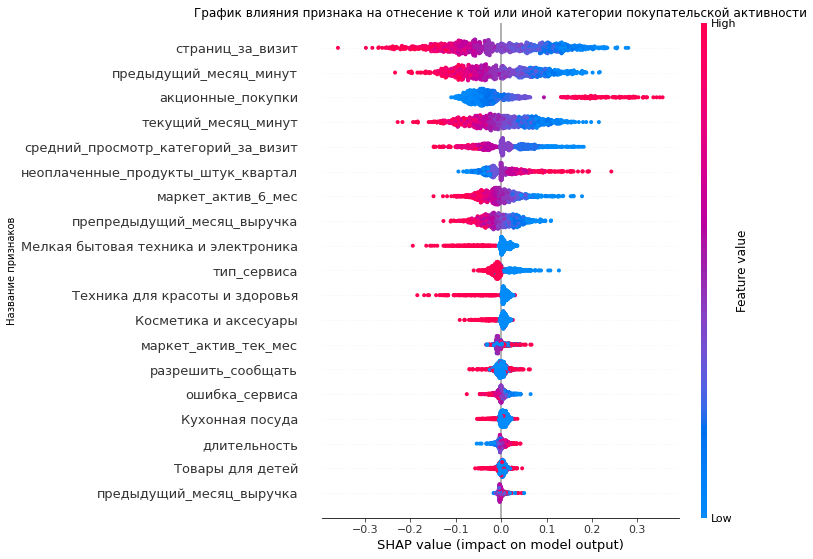

In [63]:
shap.plots.beeswarm(shap_values[: ,: ,1], max_display=20, show=False)
plt.title('–ì—Ä–∞—Ñ–∏–∫ –≤–ª–∏—è–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞ –Ω–∞ –æ—Ç–Ω–µ—Å–µ–Ω–∏–µ –∫ —Ç–æ–π –∏–ª–∏ –∏–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏')
plt.ylabel('–ù–∞–∑–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')

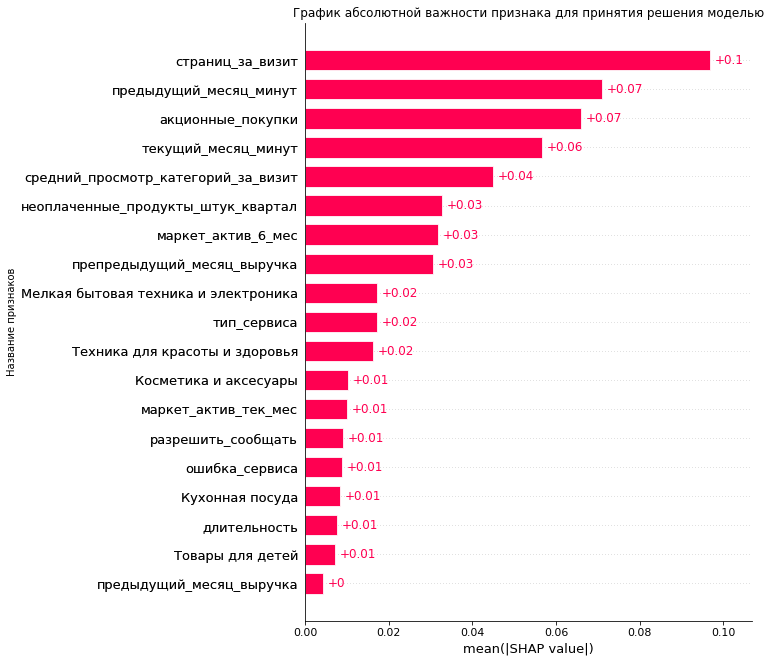

In [64]:
shap.plots.bar(shap_values[: ,: ,1], max_display=20, show = False)
plt.title('–ì—Ä–∞—Ñ–∏–∫ –∞–±—Å–æ–ª—é—Ç–Ω–æ–π –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞ –¥–ª—è –ø—Ä–∏–Ω—è—Ç–∏—è —Ä–µ—à–µ–Ω–∏—è –º–æ–¥–µ–ª—å—é')
plt.ylabel('–ù–∞–∑–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤');

<p>
	–í–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –¥–∞–Ω–Ω—ã—Ö –∏ –º–æ–¥–µ–ª—å —á—Ç–æ–±—ã –æ—Ü–µ–Ω–∏—Ç—å –∫–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –æ–Ω–∞ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç "—Ä–µ—à–µ–Ω–∏—è". –ü—Ä–∏ –ø–æ–º–æ—â–∏ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ shap —Å—Ç—Ä–æ–∏–º –¥–≤–∞ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–æ–≤ - –∞–±—Å–æ–ª—é—Ç–Ω–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞ (–≤—Ç–æ—Ä–æ–π –≥—Ä–∞—Ñ–∏–∫) –∏ —Ç–æ–≥–æ –≤ —Å—Ç–æ—Ä–æ–Ω—É –∫–∞–∫–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –æ—Ç–¥–µ–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ —Å–º–µ—â–∞–µ—Ç –º–æ–¥–µ–ª—å. –í–∏–¥–Ω–æ —á—Ç–æ —Å–∞–º—ã–µ –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —ç—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–∞–Ω–∏—Ü –∑–∞ –≤–∏–∑–∏—Ç, –≤—Ä–µ–º—è –∑–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏–π –º–µ—Å—è—Ü, –ø–∞—Ä–∞–º–µ—Ç—Ä –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö –ø–æ–∫—É–ø–æ–∫ –∏ —Å—Ä–µ–¥–Ω–∏–π –ø—Ä–æ—Å–º–æ—Ç—Ä –∫–∞—Ç–µ–≥–æ—Ä–∏–π –∑–∞ –≤–∏–∑–∏—Ç. 
</p>

In [65]:
actioners = market_table.query('–∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏ > 0.6')
display(actioners)

id –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å —Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞ —Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å  \
0     215349                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
2     215351                 –°–Ω–∏–∑–∏–ª–∞—Å—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞   
3     215352                 –°–Ω–∏–∑–∏–ª–∞—Å—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç   
11    215362                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
13    215364                 –°–Ω–∏–∑–∏–ª–∞—Å—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   
...      ...                       ...         ...                ...   
1250  216602           –ü—Ä–µ–∂–Ω–∏–π —É—Ä–æ–≤–µ–Ω—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç   
1252  216604           –ü—Ä–µ–∂–Ω–∏–π —É—Ä–æ–≤–µ–Ω—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞   
1253  216605           –ü—Ä–µ–∂–Ω–∏–π —É—Ä–æ–≤–µ–Ω—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                 –¥–∞   
1288  216640           –ü—Ä–µ–∂–Ω–∏–π —É—Ä–æ–≤–µ–Ω—å    —Å—Ç–∞–Ω–¥–∞—Ä—Ç                –Ω–µ—Ç   
1295  216647           –ü—Ä–µ–∂–Ω–∏–π —É—Ä–æ–≤–µ–Ω—å     –ø—Ä–µ–º–∏—É–º                 –¥–∞   

      –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å  –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å  –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å  \
0                    4.4                     4           819   
2                    3.2                     5           896   
3                    5.1                     3          1064   
11                   4.2                     4           438   
13                   4.3                     4           708   
...                  ...                   ...           ...   
1250                 3.4                     5           170   
1252                 4.9                     5           350   
1253                 3.2                     4           568   
1288                 5.7                     4           416   
1295                 4.0                     5           906   

      –∞–∫—Ü–∏–æ–Ω–Ω—ã–µ_–ø–æ–∫—É–ø–∫–∏                  –ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è  \
0                  0.75                      –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π   
2                  0.99                      –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π   
3                  0.94                      –¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–µ—Ç–µ–π   
11                 0.74                     –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å   
13                 0.98                     –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å   
...                 ...                                   ...   
1250               0.95        –¢–µ—Ö–Ω–∏–∫–∞ –¥–ª—è –∫—Ä–∞—Å–æ—Ç—ã –∏ –∑–¥–æ—Ä–æ–≤—å—è   
1252               0.99                     –î–æ–º–∞—à–Ω–∏–π —Ç–µ–∫—Å—Ç–∏–ª—å   
1253               0.94  –ú–µ–ª–∫–∞—è –±—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞ –∏ —ç–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∞   
1288               0.95                       –ö—É—Ö–æ–Ω–Ω–∞—è –ø–æ—Å—É–¥–∞   
1295               0.94        –¢–µ—Ö–Ω–∏–∫–∞ –¥–ª—è –∫—Ä–∞—Å–æ—Ç—ã –∏ –∑–¥–æ—Ä–æ–≤—å—è   

      —Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç  –Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª  \
0                                       4                                   4   
2                                       5                                   0   
3                                       3                                   2   
11                                      3                                   4   
13                                      3                                   3   
...                                   ...                                 ...   
1250                                    4                                   1   
1252                                    3                                   4   
1253                                    5                                   1   
1288                                    2                                   3   
1295                                    4                                   5   

      –æ—à–∏–±–∫–

In [66]:
for column in market_table_num_cols:
	print(actioners[column].describe())
	print(market_table[column].describe())

count    166.000000
mean       3.781928
std        1.078567
min        0.900000
25%        3.300000
50%        4.000000
75%        4.400000
max        5.700000
Name: –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å, dtype: float64
count    1296.000000
mean        4.256404
std         1.013525
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: –º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_6_–º–µ—Å, dtype: float64
count     166.000000
mean      604.054217
std       240.564293
min       147.000000
25%       436.500000
50%       613.000000
75%       800.750000
max      1064.000000
Name: –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å, dtype: float64
count    1296.000000
mean      602.967593
std       249.195823
min       121.000000
25%       409.500000
50%       606.500000
75%       806.250000
max      1079.000000
Name: –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å, dtype: float64
count    166.000000
mean       0.942711
std        0.038414
min        0.740000
25%        0.930000
50%        0.940000
75%        0

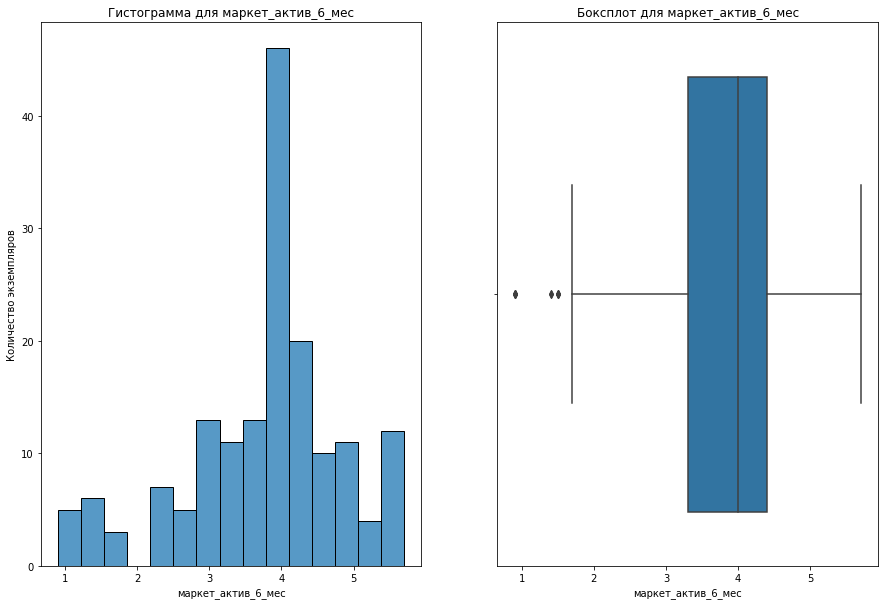

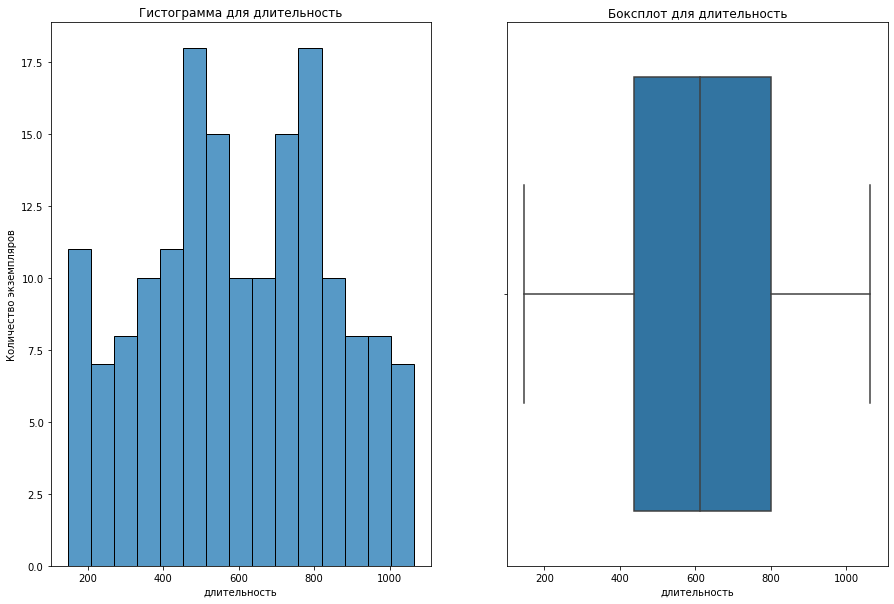

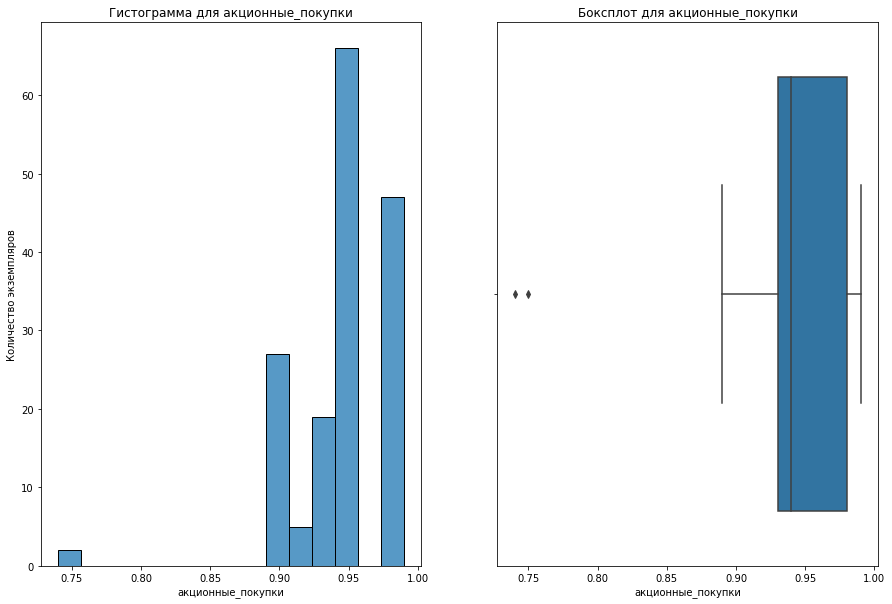

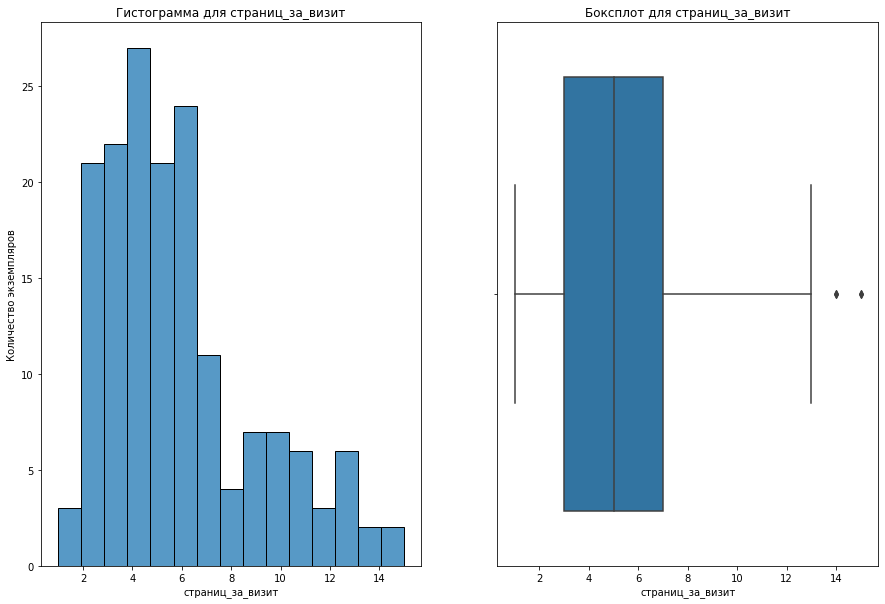

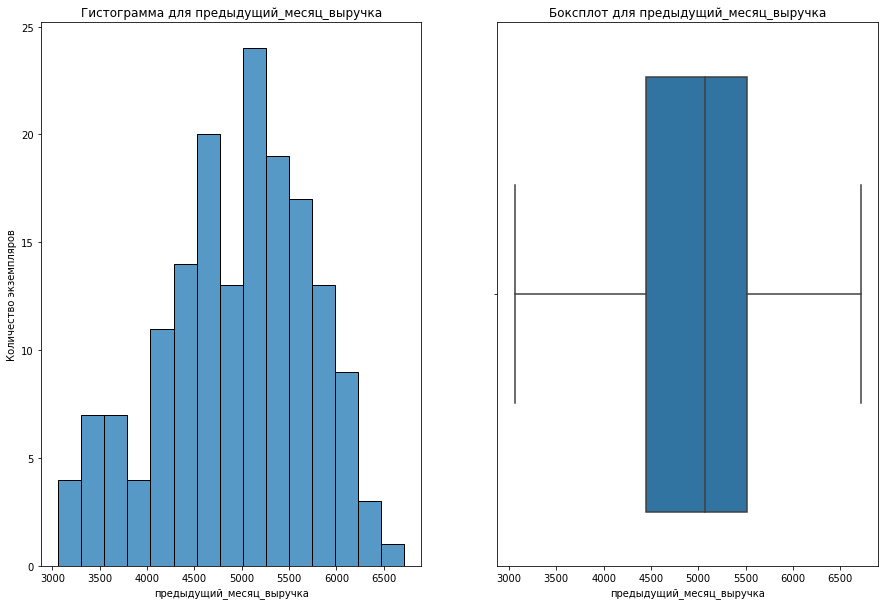

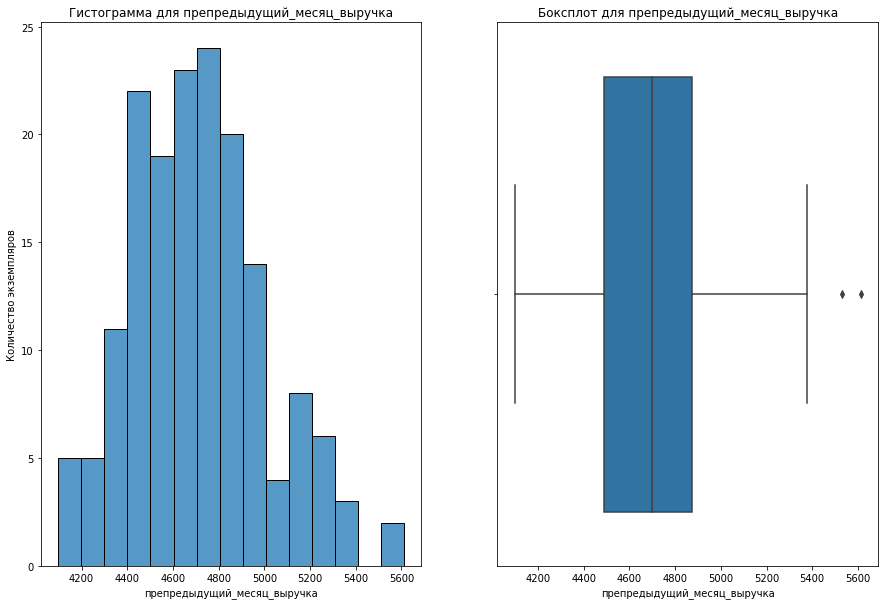

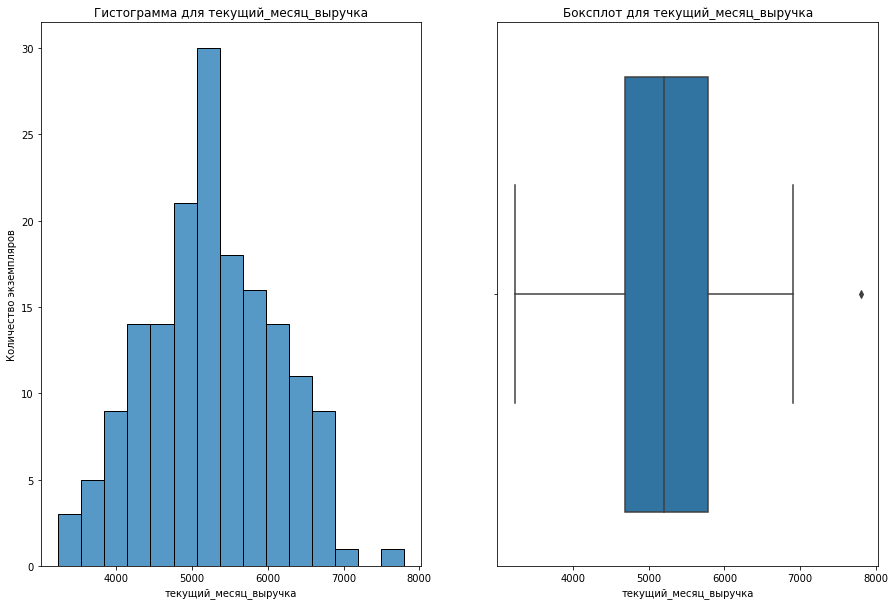

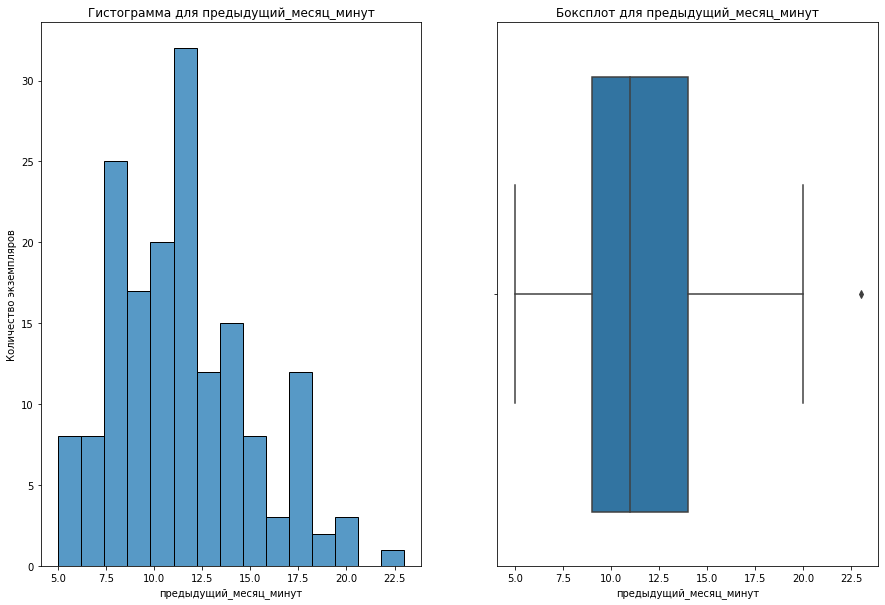

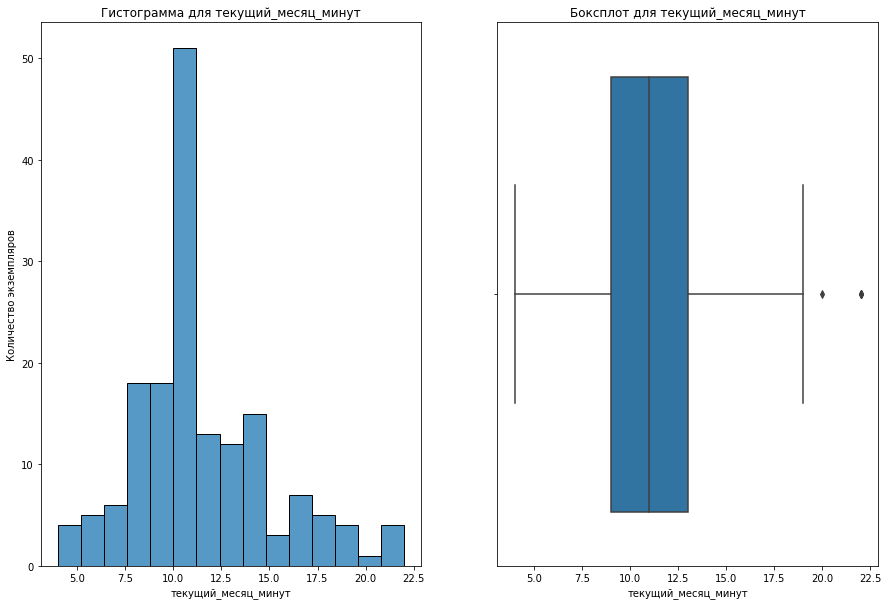

In [67]:
for column in market_table_continious_columns:
	plotGraphsForContiniousColumn(column, bins = 15, dataFrame=actioners)

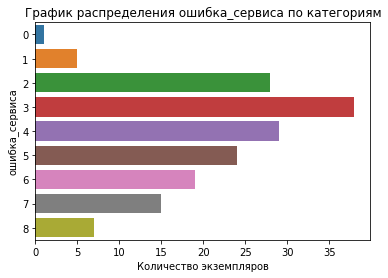

In [68]:
plotHistForCategorialColumn('–æ—à–∏–±–∫–∞_—Å–µ—Ä–≤–∏—Å–∞', dataFrame=actioners)

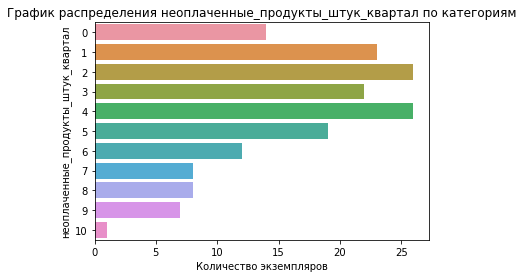

In [69]:
plotHistForCategorialColumn('–Ω–µ–æ–ø–ª–∞—á–µ–Ω–Ω—ã–µ_–ø—Ä–æ–¥—É–∫—Ç—ã_—à—Ç—É–∫_–∫–≤–∞—Ä—Ç–∞–ª', dataFrame=actioners)

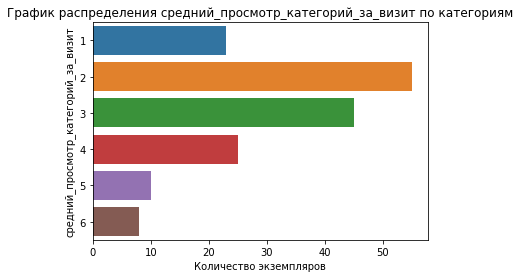

In [70]:
plotHistForCategorialColumn('—Å—Ä–µ–¥–Ω–∏–π_–ø—Ä–æ—Å–º–æ—Ç—Ä_–∫–∞—Ç–µ–≥–æ—Ä–∏–π_–∑–∞_–≤–∏–∑–∏—Ç', dataFrame=actioners)

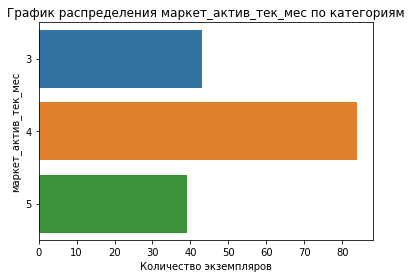

In [71]:
plotHistForCategorialColumn('–º–∞—Ä–∫–µ—Ç_–∞–∫—Ç–∏–≤_—Ç–µ–∫_–º–µ—Å', dataFrame=actioners)

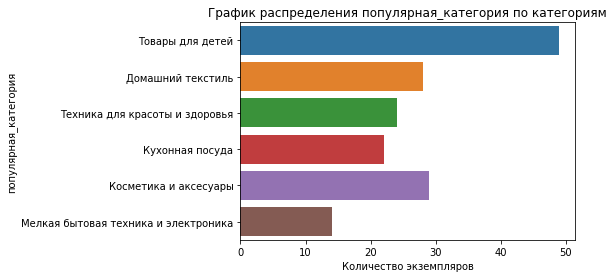

In [72]:
plotHistForCategorialColumn('–ø–æ–ø—É–ª—è—Ä–Ω–∞—è_–∫–∞—Ç–µ–≥–æ—Ä–∏—è', dataFrame=actioners)

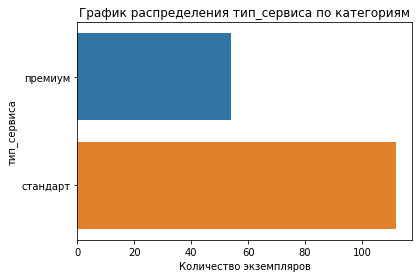

In [73]:
plotHistForCategorialColumn('—Ç–∏–ø_—Å–µ—Ä–≤–∏—Å–∞', dataFrame=actioners)

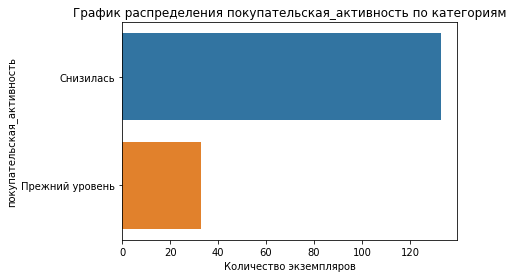

In [74]:
plotHistForCategorialColumn('–ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è_–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å', dataFrame=actioners)

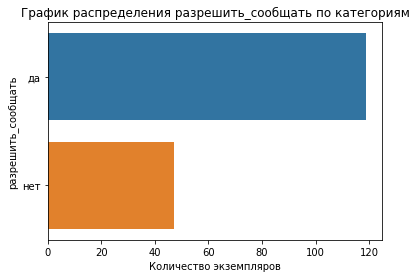

In [75]:
plotHistForCategorialColumn('—Ä–∞–∑—Ä–µ—à–∏—Ç—å_—Å–æ–æ–±—â–∞—Ç—å', dataFrame=actioners)

<p>
	–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –≤ –≤—ã–±—Ä–∞–Ω–Ω–æ–º —Å–µ–≥–º–µ–Ω—Ç–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –¥–∞–Ω–Ω—ã–µ –≤—ã–≥–ª—è–¥—è—Ç –ø–æ—Ö–æ–∂–∏–º –Ω–∞ –æ—Å–Ω–æ–≤–Ω–æ–π –º–∞—Å—Å–∏–≤ –¥–∞–Ω–Ω—ã—Ö –æ–±—Ä–∞–∑–æ–º, –Ω–æ –º–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å –¥–≤–∞ –∑–∞–º–µ—Ç–Ω—ã—Ö –æ—Ç–ª–∏—á–∏—è: 
</p>
<p>
	1) –ü–µ—Ä–≤–æ–µ —ç—Ç–æ –ø–µ—Ä–µ–∫–æ—Å –≤ —Å—Ç–æ—Ä–æ–Ω—É —Å–Ω–∏–∑–∏–≤—à–∏–π—Å—è –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏. –≠—Ç–æ –Ω–µ–ø–ª–æ—Ö–æ–π –ø—Ä–∏–∑–Ω–∞–∫ —Å —Ç–æ–π —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è, —á—Ç–æ –∑–Ω–∞—á–∏—Ç –∏–º–µ–Ω–Ω–æ –¥–ª—è —ç—Ç–æ–π –≥—Ä—É–ø–ø—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –º—ã –º–æ–∂–µ–º –ø—Ä–∏–¥—É–º–∞—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—É—é —Å—Ç—Ä–∞—Ç–µ–≥–∏—é —É–ª—É—á—à–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–≥–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è.  
</p>
<p>
	2) –í—Ç–æ—Ä–æ–µ —ç—Ç–æ –∑–∞–º–µ—Ç–Ω–æ —Å–Ω–∏–∑–∏–≤—à–µ–µ—Å—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö —Å—Ç—Ä–∞–Ω–∏—Ü –∑–∞ –≤–∏–∑–∏—Ç. –≠—Ç–æ —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ —á–∞—â–µ –ø—Ä–∏—Ö–æ–¥—è—Ç –∑–∞ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–º —Ç–æ–≤–∞—Ä–æ–º.   
</p>
</p>
	–ú–æ–∂–Ω–æ –±—ã–ª–æ –±—ã –ø–æ–¥—É–º–∞—Ç—å, —á—Ç–æ —ç—Ç–æ –º–µ–Ω–µ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏, –Ω–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∏—Ö –≤—ã—Ä—É—á–∫–∏ –Ω–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç –æ—Å–Ω–æ–≤–Ω–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ –¥–∞–Ω–Ω—ã—Ö. –†–∞–±–æ—á–µ–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –¥–ª—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–∑ –¥–∞–Ω–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —ç—Ç–æ —É–≤–µ–ª–∏—á–∏—Ç—å —á–∏—Å–ª–æ –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö –∫–∞–º–ø–∞–Ω–∏–π, –≤–æ–∑–º–æ–∂–Ω–æ —Å–Ω–∏–∑–∏—Ç—å —Ä–∞–∑–º–µ—Ä –∞–∫—Ü–∏–π (—á—Ç–æ–±—ã –Ω–µ –Ω–µ—Å—Ç–∏ —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–π –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–π —Ñ–∏–Ω–∞–Ω—Å–æ–≤–æ–π –Ω–∞–≥—Ä—É–∑–∫–∏), –Ω–æ –Ω–∞—Ä–∞—Å—Ç–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ–≤–∞—Ä–æ–≤ –ø–æ –∞–∫—Ü–∏–∏, —ç—Ç–æ –≤–æ–∑–º–æ–∂–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –¥–ª—è –¥–∞–Ω–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π. 
<p>

### –í—ã–≤–æ–¥

<p>
	–¶–µ–ª—å—é –Ω–∞—à–µ–π —Ä–∞–±–æ—Ç—ã –±—ã–ª–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–æ–≥–æ –ø–æ–≤–µ–¥–µ–Ω–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —ç—Ç–æ–≥–æ –ø–æ–≤–µ–¥–µ–Ω–∏—è. 
</p>
<p>
	–í –ø–µ—Ä–≤–æ–π —á–∞—Å—Ç–∏ –º—ã –ø—Ä–æ–∏–∑–≤–µ–ª–∏ –±–æ–ª–µ–µ –∏–ª–∏ –º–µ–Ω–µ–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—É—é –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –¥–∞–Ω–Ω—ã—Ö - –ø—Ä–∏–≤–µ–ª–∏ –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤ –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É, –ø—Ä–æ–≤–µ—Ä–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã –∏ –ø—Ä–æ–ø—É—Å–∫–∏. –ó–∞—Ç–µ–º –º—ã –ø—Ä–æ–≤–µ–ª–∏ –∞–Ω–∞–ª–∏–∑ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∞–Ω–Ω—ã—Ö - –ø–æ—Å–º–æ—Ç—Ä–µ–ª–∏ –Ω–∞ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤, –ø–æ—Å—Ç—Ä–æ–∏–ª–∏ –≥—Ä–∞—Ñ–∏–∫–∏. –£–¥–∞–ª–∏–ª —è–≤–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã –∏–∑ –¥–∞–Ω–Ω—ã—Ö. –ó–∞–º–µ—Ç–∏–ª–∏, —á—Ç–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –º–æ–∂–Ω–æ —Ä–∞–∑–±–∏—Ç—å –Ω–∞ –≥—Ä—É–ø–ø—ã –ø–æ —Ä–∞–∑–ª–∏—á–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º: –∞–∫—Ü–∏–æ–Ω–Ω–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏, –ø—Ä–∏–±—ã–ª–∏, –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –∏ –ø—Ä–æ—á–µ–µ. 
</p>
<p>
	–ó–∞—Ç–µ–º –º—ã –æ–±—ä–µ–¥–∏–Ω–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ –∏–∑ —Ç—Ä—ë—Ö —Ç–∞–±–ª–∏—Ü –≤ –æ–¥–Ω—É –∏ –ø–æ—Å–º–æ—Ç—Ä–µ–ª–∏ –Ω–∞ –¥–∞–Ω–Ω—ã–µ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ - –ø—Ä–æ–≤–µ—Ä–∏–ª–∏ –Ω–∞ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å. –ü–æ—Å—á–∏—Ç–∞–ª–∏ –∏–Ω—Ñ–ª—è—Ü–∏–æ–Ω–Ω—ã–µ —Ñ–∞–∫—Ç–æ—Ä—ã, —á—Ç–æ–±—ã –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–µ—è–≤–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –ø–æ–º–µ—à–∞—Ç—å —É—Å–ø–µ—à–Ω–æ–º—É –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—é. –ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—É —Å–∏–ª—å–Ω—ã—Ö –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –Ω–∞—Ä—É—à–∏—Ç—å –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ, –≤—ã—è–≤–ª–µ–Ω–æ –Ω–µ –±—ã–ª–æ.
</p>
<p>
	–°–ª–µ–¥—É—é—â–∏–º —à–∞–≥–æ–º –º—ã —Å—Ç—Ä–æ–∏–º –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –≤—ã–±–æ—Ä–∞ –ª—É—á—à–µ –º–æ–¥–µ–ª–∏, –ø–∞–π–ø–ª–∞–π–Ω —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ —ç—Ç–∞–ø–∞ –ø—Ä–µ–±–æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö –∏ –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è. –ì–æ—Ç–æ–≤—ã–π –ø–∞–π–ø–ª–∞–π–Ω –º—ã –ø–µ—Ä–µ–¥–∞—ë–º –≤ GridSearchCV –≤–º–µ—Å—Ç–µ —Å —Å–µ—Ç–∫–æ–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –∫–æ—Ç–æ—Ä–∞—è –ø–µ—Ä–µ–±–∏—Ä–∞–µ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–æ–¥–µ–ª–µ–π —Å –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏: –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è, –¥–µ—Ä–µ–≤–∞ –ø—Ä–∏–Ω—è—Ç–∏ —Ä–µ—à–µ–Ω–∏–π, –º–æ–¥–µ–ª–∏ knn –∏ –º–µ—Ç–æ–¥–∞ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤. –ó–∞—Ç–µ–º –ø–æ–ª—É—á–∏–≤—à—É—é—Å—è –∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏—é –º—ã –æ–±—É—á–∞–µ–º –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –∏–∑ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã, –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ —É–±–∏—Ä–∞—è –∏–∑ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Å—Ç–æ–ª–±—Ü—ã, –∫–æ—Ç–æ—Ä—ã–µ —Å–æ–∑–¥–∞—é—Ç —É—Ç–µ—á–∫—É –¥–∞–Ω–Ω—ã—Ö - –≤—Å—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ç–µ–∫—É—â–µ–º –º–µ—Å—è—Ü–µ. –ù–∞–∏–±–æ–ª–µ–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–π —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫–∏ roc-auc –ø–æ–ª—É—á–∏–ª–∞—Å—å –º–æ–¥–µ–ª—å –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤. –î–∞–ª–µ–µ –º—ã –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ —Å—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö. 
</p>
<p>
	–ó–∞—Ç–µ–º –º—ã –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —Ç–æ–≥–æ –∫–∞–∫ –æ–Ω–∞ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç "—Ä–µ—à–µ–Ω–∏—è". –°–∞–º—ã–º–∏ –≤–∞–∂–Ω—ã–º–∏ –¥–ª—è –º–æ–¥–µ–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ —è–≤–ª—è—é—Ç—Å—è —ç—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–∞–Ω–∏—Ü –∑–∞ –≤–∏–∑–∏—Ç, –≤—Ä–µ–º—è –∑–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏–π –º–µ—Å—è—Ü, –ø–∞—Ä–∞–º–µ—Ç—Ä –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö –ø–æ–∫—É–ø–æ–∫ –∏ —Å—Ä–µ–¥–Ω–∏–π –ø—Ä–æ—Å–º–æ—Ç—Ä –∫–∞—Ç–µ–≥–æ—Ä–∏–π –∑–∞ –≤–∏–∑–∏—Ç. –ù–∞–≥–ª—è–¥–Ω—ã–µ –≥—Ä–∞—Ñ–∏–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –≤–∞–∂–Ω–æ—Å—Ç—å –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–º –ø—É–Ω–∫—Ç–µ.
</p>
<p>
	–í –∫–æ–Ω—Ü–µ —Ä–∞–±–æ—Ç—ã –º—ã —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º –º–∞—Å—Å–∏–≤ –¥–∞–Ω–Ω—ã—Ö –æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è—Ö —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –∏—Ö –Ω–∞ –ø–æ–¥–≥—Ä—É–ø–ø—ã - –≤–æ–∑–º–æ–∂–Ω–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–π: –ø–æ –≤—ã—Ä—É—á–∫–µ —Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è, –ø–æ –∞–∫—Ü–∏–æ–Ω–Ω—ã–º –ø–æ–∫—É–ø–∫–∞–º, –ø–æ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏, –ø–æ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—é –≤—ã—Ä—É—á–∫–∏ –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–º –º–µ—Å—Ç–µ. –í –¥–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ –¥–ª—è –±–æ–ª–µ–µ –ø–æ–¥—Ä–æ–±–Ω–æ–≥–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏—è –±—ã–ª –≤—ã–±—Ä–∞–Ω —Å–ø–æ—Å–æ–± —Ä–∞–∑–±–∏–µ–Ω–∏—è –ø–æ –¥–æ–ª–µ –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö –ø–æ–∫—É–ø–æ–∫ –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è, —Ç–∞–∫ –∫–∞–∫ –Ω–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å–≤—É—é—â–µ–º –≥—Ä–∞—Ñ–∏–∫–µ –±—ã–ª–æ —á–µ—Ç–∫–æ –≤–∏–¥–Ω–æ –¥–≤–µ –æ—Ç–¥–µ–ª—å–Ω—ã–µ –≥—Ä—É–ø–ø—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∏ –æ–Ω–∏ —è–≤–Ω–æ –¥–æ–ª–∂–Ω—ã —Ä–∞–∑–ª–∏—á–∞—Ç—å—Å—è –ø–æ –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–æ–º—É –ø–æ–≤–µ–¥–µ–Ω–∏—é, —á—Ç–æ –º–æ–∂–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –Ω–µ–∫–æ–µ–π —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –¥–ª—è –∫–∞–∂–¥–æ–π –≥—Ä—É–ø–ø—ã. 
</p>
<p>
	–ü–æ —Ä–µ—É–∑–ª—å—Ç–∞—Ç–∞–º –∞–Ω–∞–ª–∏–∑–∞ –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –≥–ª–∞–≤–Ω—ã–µ –æ—Ç–ª–∏—á–∏—è "–∞–∫—Ü–∏–æ–Ω–Ω–æ–π" –≥—Ä—É–ø–ø—ã –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö - –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –∏ —Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º—ã—Ö —Å—Ç—Ä–∞–Ω–∏—Ü –∑–∞ –≤–∏–∑–∏—Ç(–ø—Ä–∏—á—ë–º –≤—ã—Ä—É—á–∫–∞ —Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –æ—Å–Ω–æ–≤–Ω–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ –¥–∞–Ω–Ω—ã—Ö). –≠—Ç–æ –Ω–∞—Ç–∞–ª–∫–∏–≤–∞–µ—Ç –Ω–∞—Å –Ω–∞ –º—ã—Å–ª—å, —á—Ç–æ —ç—Ç–æ –≥—Ä—É–ø–ø–∞ –ª—é–¥–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –æ–±—Ä–∞—â–∞—é—Ç –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –∞–∫—Ü–∏–∏ (–≤–æ–∑–º–æ–∂–Ω–æ –≤–Ω–µ—à–Ω–∏–µ) –∏ –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ –ø—Ä–∏—Ö–æ–¥—è—Ç –∫—É–ø–∏—Ç—å –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–π —Ç–æ–≤–∞—Ä –ø–æ –∞–∫—Ü–∏–∏. –ü—Ä–∏ —ç—Ç–æ–º –∏—Ö –ø–æ–∫—É–ø–∞—Ç–µ–ª—å—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –±–æ–ª–µ–µ –Ω–∏–∑–∫–∞—è —á–µ–º –≤ –æ–±—â–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ, –∞ –∑–Ω–∞—á–∏—Ç –∏–º–µ–µ—Ç —Å–º—ã—Å–ª –≤ —Ä–∞–º–∫–∞—Ö –ª–æ–∫–∞–ª—å–Ω–æ–≥–æ —É–ª—É–¥—à–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–≥–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è –æ—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å—Å—è –Ω–∞ —ç—Ç—É –≥—Ä—É–ø–ø—É. –†–∞–±–æ—á–µ–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ —Å–æ—Å—Ç–æ–∏—Ç –≤ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø—Ä–æ—Å—Ç–æ–π –∏–¥–µ–µ: —É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∞–∫—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤ (–≤–æ–∑–º–æ–∂–Ω–æ –∑–∞ —Å—á—ë—Ç —á–∞—Å—Ç–∏—á–Ω–æ–≥–æ —Å–Ω–∏–∂–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–∞ —Å–∫–∏–¥–æ–∫) –∏ —É–≤—á–µ–ª–∏—á–∏—Ç—å —Ä–∞–∑–º–µ—â–µ–Ω–∏–µ —Ä–µ–∫–ª–∞–º—ã —Å–∫–∏–¥–æ–∫ –Ω–∞ –≤–Ω–µ—à–Ω–∏—Ö –ø–ª–æ—â–∞–¥–∫–∞—Ö (–∏–ª–∏ —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–π —Ü–µ–ª–µ–≤–æ–≥–æ —Å–µ–≥–º–µ–Ω—Ç–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–π –æ —Å–∫–∏–¥–∫–∞—Ö –≤ –º–∞–≥–∞–∑–∏–Ω–µ, –µ—Å–ª–∏ –µ—Å—Ç—å —Ç–∞–∫–∞—è –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å), —Ç–∞–∫ –∫–∞–∫ –¥–∞–Ω–Ω–∞—è –≥—Ä—É–ø–ø–∞ —è–≤–Ω–æ —Å–∫–ª–æ–Ω–Ω–∞ –∫ –ø–æ–∫—É–ø–∫–∞–º –ø–æ —Å–∫–∏–¥–∫–µ/–∞–∫—Ü–∏–∏. –í–æ–∑–º–æ–∂–Ω–æ —Å—Ç–æ–∏—Ç –æ—Ç–¥–µ–ª—å–Ω–æ –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –¥—Ä—É–≥–∏—Ö –≥—Ä—É–ø–ø, —á—Ç–æ–±—ã —Ç–∞–∫–∂–µ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∏—Ö –Ω–∞ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—É—é –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–≥–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è.
</p>